In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glob
from tifffile import imread
import copy
import pickle
from skimage.measure import profile_line
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.patches as patches

In [2]:
font = {
        'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 7
        }
padding = {
    'titlepad': 3,
    'labelpad': 1,
}
matplotlib.rc('font', **font)
matplotlib.rc('axes', **padding)

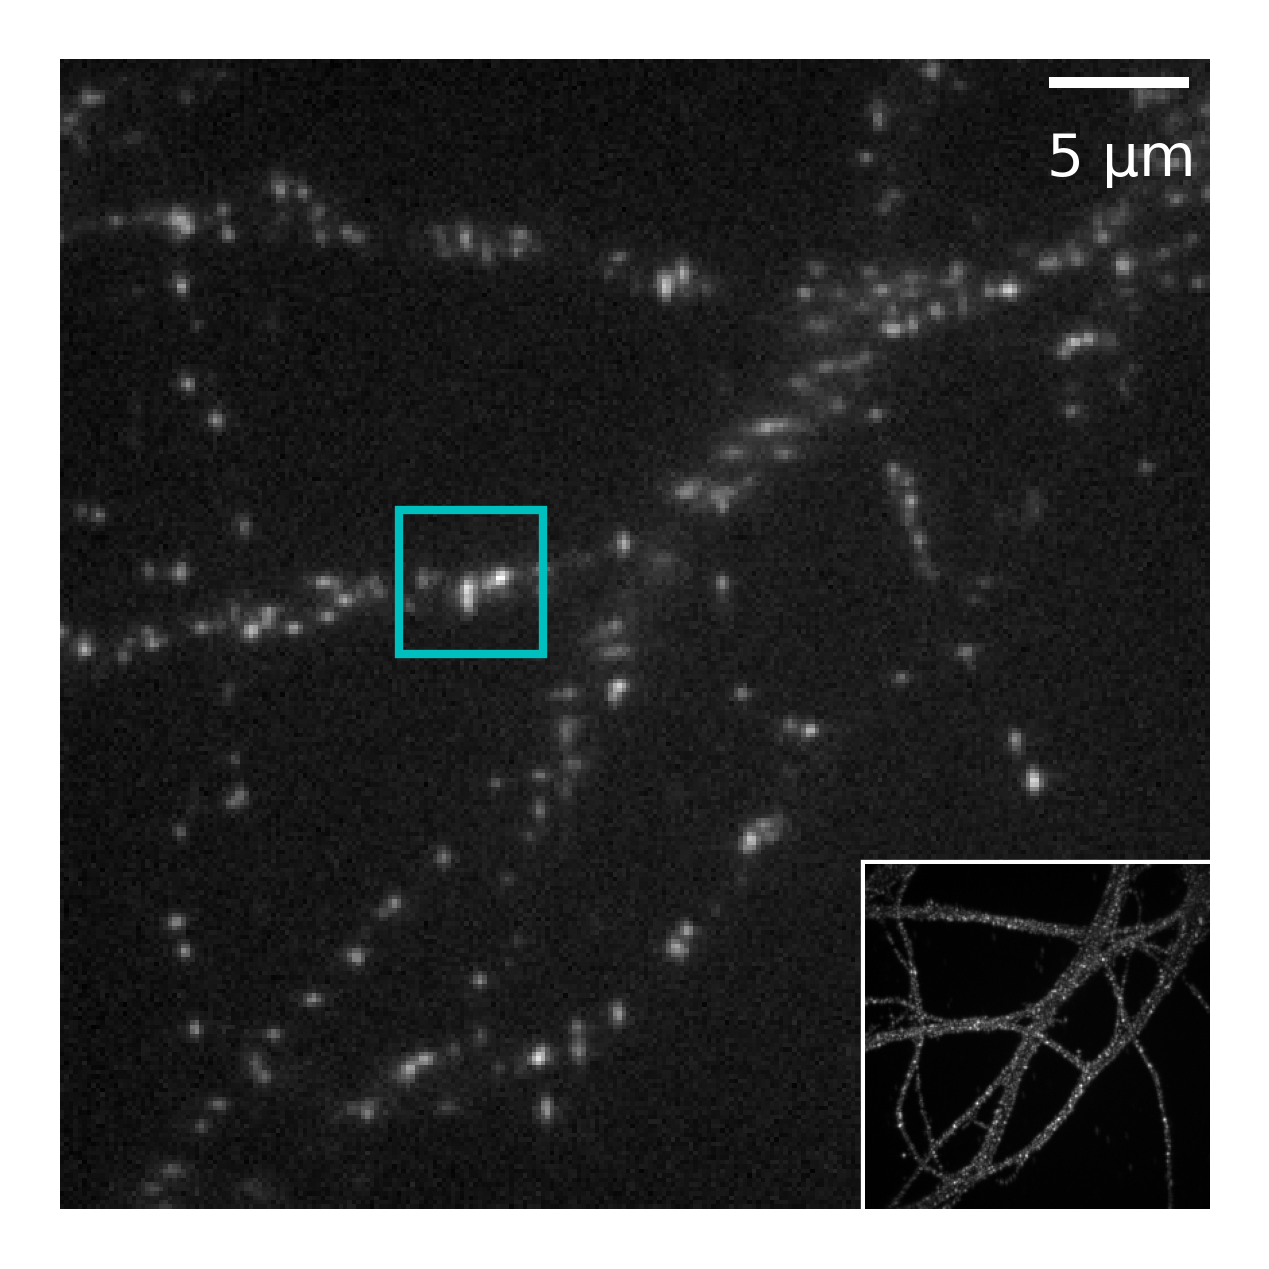

In [3]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2,2), dpi=600, layout='constrained')

axins = ax.inset_axes([0.7, 0.0, 0.3, 0.3])
img = imread('quantization/tif/Uncompressed.tif')
img_max = np.amax(img, axis=0)
axins.imshow(img_max, cmap='gray')
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xticks([])
axins.set_yticks([])
axins.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
axins.patch.set_linewidth(1)
axins.patch.set_edgecolor('w')

img = img[0, ...]
img = img * 1.0 / img.max()
img = np.power(img, 0.5)
ax.imshow(img, cmap='gray')

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

ax.add_artist(ScaleBar(160 , 'nm', location='upper right', frameon=False, color='w'))
# ax.annotate('1.6$\\times$', (5, 15), color='w')
# ax.add_patch(patches.Rectangle((98, 206), 32, 32, linewidth=1, edgecolor='c', facecolor='none'))
ax.add_patch(patches.Rectangle((75, 100), 32, 32, linewidth=1, edgecolor='c', facecolor='none'))

fig.savefig('STORM_raw.pdf')

In [4]:
data = pd.read_csv("STORM_quantization.csv")
beta_data = data[data["Compression Method"].str.startswith("beta8_")]
beta_data['Compression Method'] = [x.replace('beta8_', '') for x in beta_data['Compression Method']]
sqrt_data = data[data["Compression Method"].str.startswith("sqrt8_")]
sqrt_data['Compression Method'] = [x.replace('sqrt8_', '') for x in sqrt_data['Compression Method']]
av1_data = data[data["Compression Method"].str.contains("AV1Q")]
av1_data = av1_data[~av1_data["Compression Method"].str.contains("grain")]
av1_data['Compression Method'] = [x.replace('beta10_', '') for x in sqrt_data['Compression Method']]
# grain_data = data[data["Compression Method"].str.contains("grain")]
# grain_data['Compression Method'] = [x.replace('beta10_', '') for x in sqrt_data['Compression Method']]
# grain_data['Compression Method'] = [x.replace('_grain5', '') for x in sqrt_data['Compression Method']]

/tmp/ipykernel_3721939/628986682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta_data['Compression Method'] = [x.replace('beta8_', '') for x in beta_data['Compression Method']]
/tmp/ipykernel_3721939/628986682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_data['Compression Method'] = [x.replace('sqrt8_', '') for x in sqrt_data['Compression Method']]


In [5]:
colors = sns.color_palette('muted')
colors

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

/tmp/ipykernel_3721939/1688635484.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_twiny.set_xticklabels(labels)
/tmp/ipykernel_3721939/1688635484.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


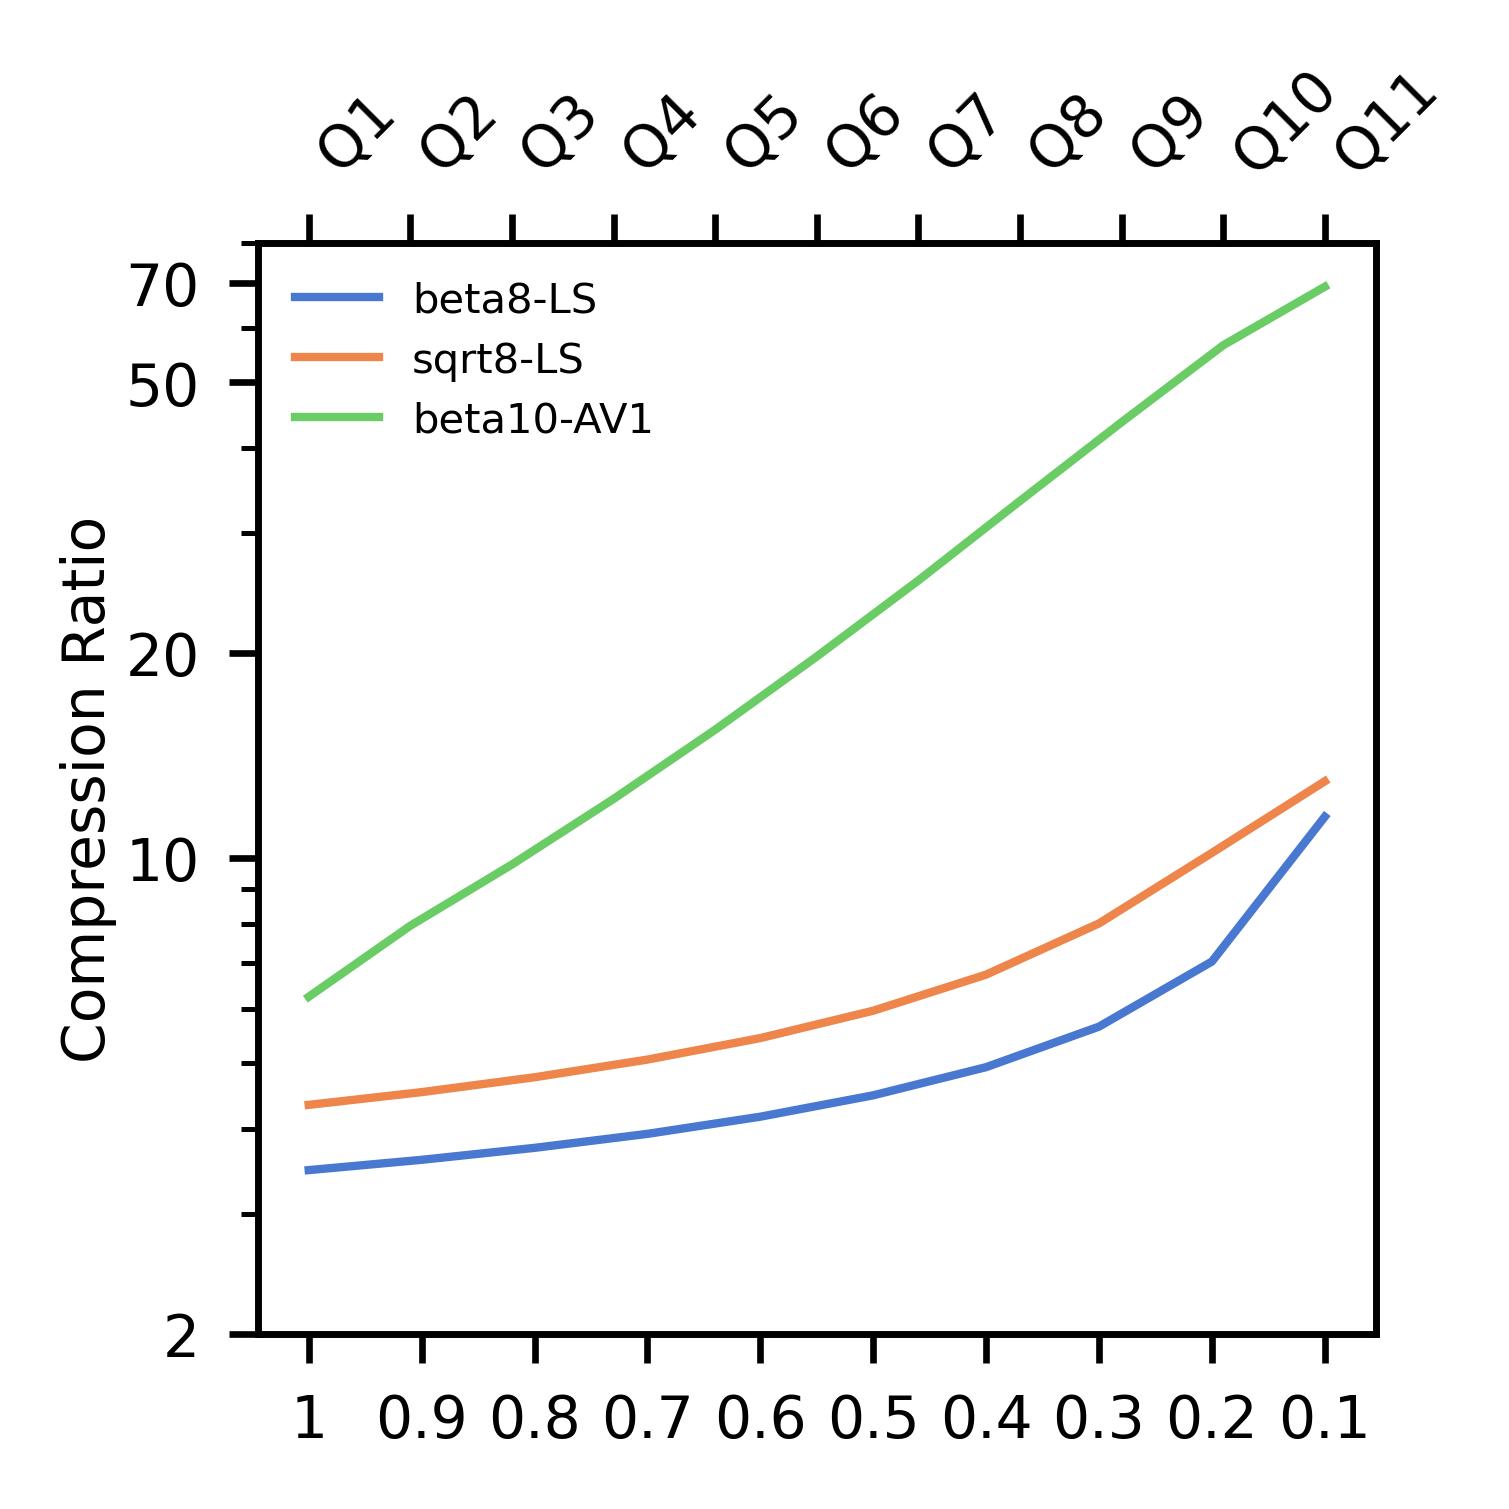

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2.4, 2.4), dpi=600, layout='constrained')
sns.set_palette('muted')
ax_twiny = ax.twiny()

sns.lineplot(data=av1_data, x="Compression Method", y="Compression Ratio", ax=ax_twiny, linewidth=1, color=colors[2], label='beta10-AV1')
# sns.lineplot(data=grain_data, x="Compression Method", y="Compression Ratio", ax=ax_twiny, linewidth=1, color=colors[3], label='beta10-AV1-grain5')
sns.lineplot(data=beta_data[~beta_data["Compression Method"].str.contains('scale2.0')], x="Compression Method", y="Compression Ratio", ax=ax, linewidth=1, label='beta8-LS')
sns.lineplot(data=sqrt_data[~sqrt_data["Compression Method"].str.contains('scale2.0')], x="Compression Method", y="Compression Ratio", ax=ax, linewidth=1, label='sqrt8-LS')

ax.legend(loc='upper left', frameon=False, fontsize=5)
ax_twiny.legend(frameon=False, bbox_to_anchor=(0.388, 0.890), fontsize=5)


labels = []
for i in range(1, 12, 1):
    if i < 10:
        labels.append(f'Q{i} ')
    else:
        labels.append(f'Q{i}')
ax_twiny.set_xticklabels(labels)
for label in ax_twiny.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('left')
        
ax.set_xlabel('')
ax.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.invert_xaxis()
ax.set_yscale('log')
ax_twiny.set_yticks([2, 10, 20, 50, 70], [2, 10, 20, 50, 70])

ax_twiny.set_xlabel('')
ax_twiny.set_ylabel("Compression ratio")

fig.savefig('STORM_compression_ratio_plot.pdf')

In [3]:
data = pd.read_csv('SMLM_quantization_summary_10192023grain.csv')
data = data[~data["Compression Type"].str.contains('beta10-scale')]
data = data[~data["Compression Type"].str.contains('lossless')]
data['Compression Type'] = [x.replace('-scale', '-LS') for x in data['Compression Type']]
data

Unnamed: 0 Compression Type         Compression Method  Compression Ratio   
1            1       beta10-AV1               beta10_AV1Q1           6.251242  \
2            2       beta10-AV1               beta10_AV1Q2           7.949147   
3            3       beta10-AV1               beta10_AV1Q3           9.779120   
4            4       beta10-AV1               beta10_AV1Q4          12.207025   
5            5       beta10-AV1               beta10_AV1Q5          15.426141   
6            6       beta10-AV1               beta10_AV1Q6          19.761610   
7            7       beta10-AV1               beta10_AV1Q7          25.561687   
8            8       beta10-AV1               beta10_AV1Q8          33.450721   
9            9       beta10-AV1               beta10_AV1Q9          43.658315   
10          10       beta10-AV1              beta10_AV1Q10          56.635211   
11          11       beta10-AV1              beta10_AV1Q11          69.041714   
12          12         beta8-LS           beta8_Blosc-Zstd           3.477952   
13          13         beta8-LS  beta8_scale0.9_Blosc-Zstd           3.601062   
14          14         beta8-LS  beta8_scale0.8_Blosc-Zstd           3.749835   
15          15         beta8-LS  beta8_scale0.7_Blosc-Zstd           3.931440   
16          16         beta8-LS  beta8_scale0.6_Blosc-Zstd           4.166730   
17          17         beta8-LS  beta8_scale0.5_Blosc-Zstd           4.479269   
18          18         beta8-LS  beta8_scale0.4_Blosc-Zstd           4.926812   
19          19         beta8-LS  beta8_scale0.3_Blosc-Zstd           5.650445   
20          20         beta8-LS  beta8_scale0.2_Blosc-Zstd           7.041613   
21          21         beta8-LS  beta8_scale0.1_Blosc-Zstd          11.492396   
32          34         sqrt8-LS            sqrt8_BloscZstd           4.336944   
33          35         sqrt8-LS   sqrt8_scale0.9_BloscZstd           4.527577   
34          36         sqrt8-LS   sqrt8_scale0.8_BloscZstd           4.761354   
35          37         sqrt8-LS   sqrt8_scale0.7_BloscZstd           5.054657   
36          38         sqrt8-LS   sqrt8_scale0.6_BloscZstd           5.436246   
37          39         sqrt8-LS   sqrt8_scale0.5_BloscZstd           5.963381   
38          40         sqrt8-LS   sqrt8_scale0.4_BloscZstd           6.737370   
39          41         sqrt8-LS   sqrt8_scale0.3_BloscZstd           8.011742   
40          42         sqrt8-LS   sqrt8_scale0.2_BloscZstd          10.171480   
41          43         sqrt8-LS   sqrt8_scale0.1_BloscZstd          12.957986   
42          44   beta10-AV1-NM5        beta10_AV1Q1_grain5           7.523083   
43          45   beta10-AV1-NM5        beta10_AV1Q2_grain5           9.602752   
44          46   beta10-AV1-NM5        beta10_AV1Q3_grain5          12.509605   
45          47   beta10-AV1-NM5        beta10_AV1Q4_grain5          16.708174   
46          48   beta10-AV1-NM5        beta10_AV1Q5_grain5          22.169382   
47          49   beta10-AV1-NM5        beta10_AV1Q6_grain5          28.881967   
48          50   beta10-AV1-NM5        beta10_AV1Q7_grain5          37.755958   
49          51   beta10-AV1-NM5        beta10_AV1Q8_grain5          48.169846   
50          52   beta10-AV1-NM5        beta10_AV1Q9_grain5          59.346615   
51          53   beta10-AV1-NM5       beta10_AV1Q10_grain5          68.662007   
52          54   beta10-AV1-NM5       beta10_AV1Q11_grain5          75.014067   

    Localization Error Mean  Localization Error Std  Uncertainty Mean   
1                  5.095070               17.227657         12.566112  \
2                  6.381333               18.903481         12.529946   
3                  8.263787               21.268435         12.450007   
4                 10.013860               22.948798         12.337950   
5                 12.260560               26.178560         12.159914   
6                 14.140934               27.741680         11.952189   
7        

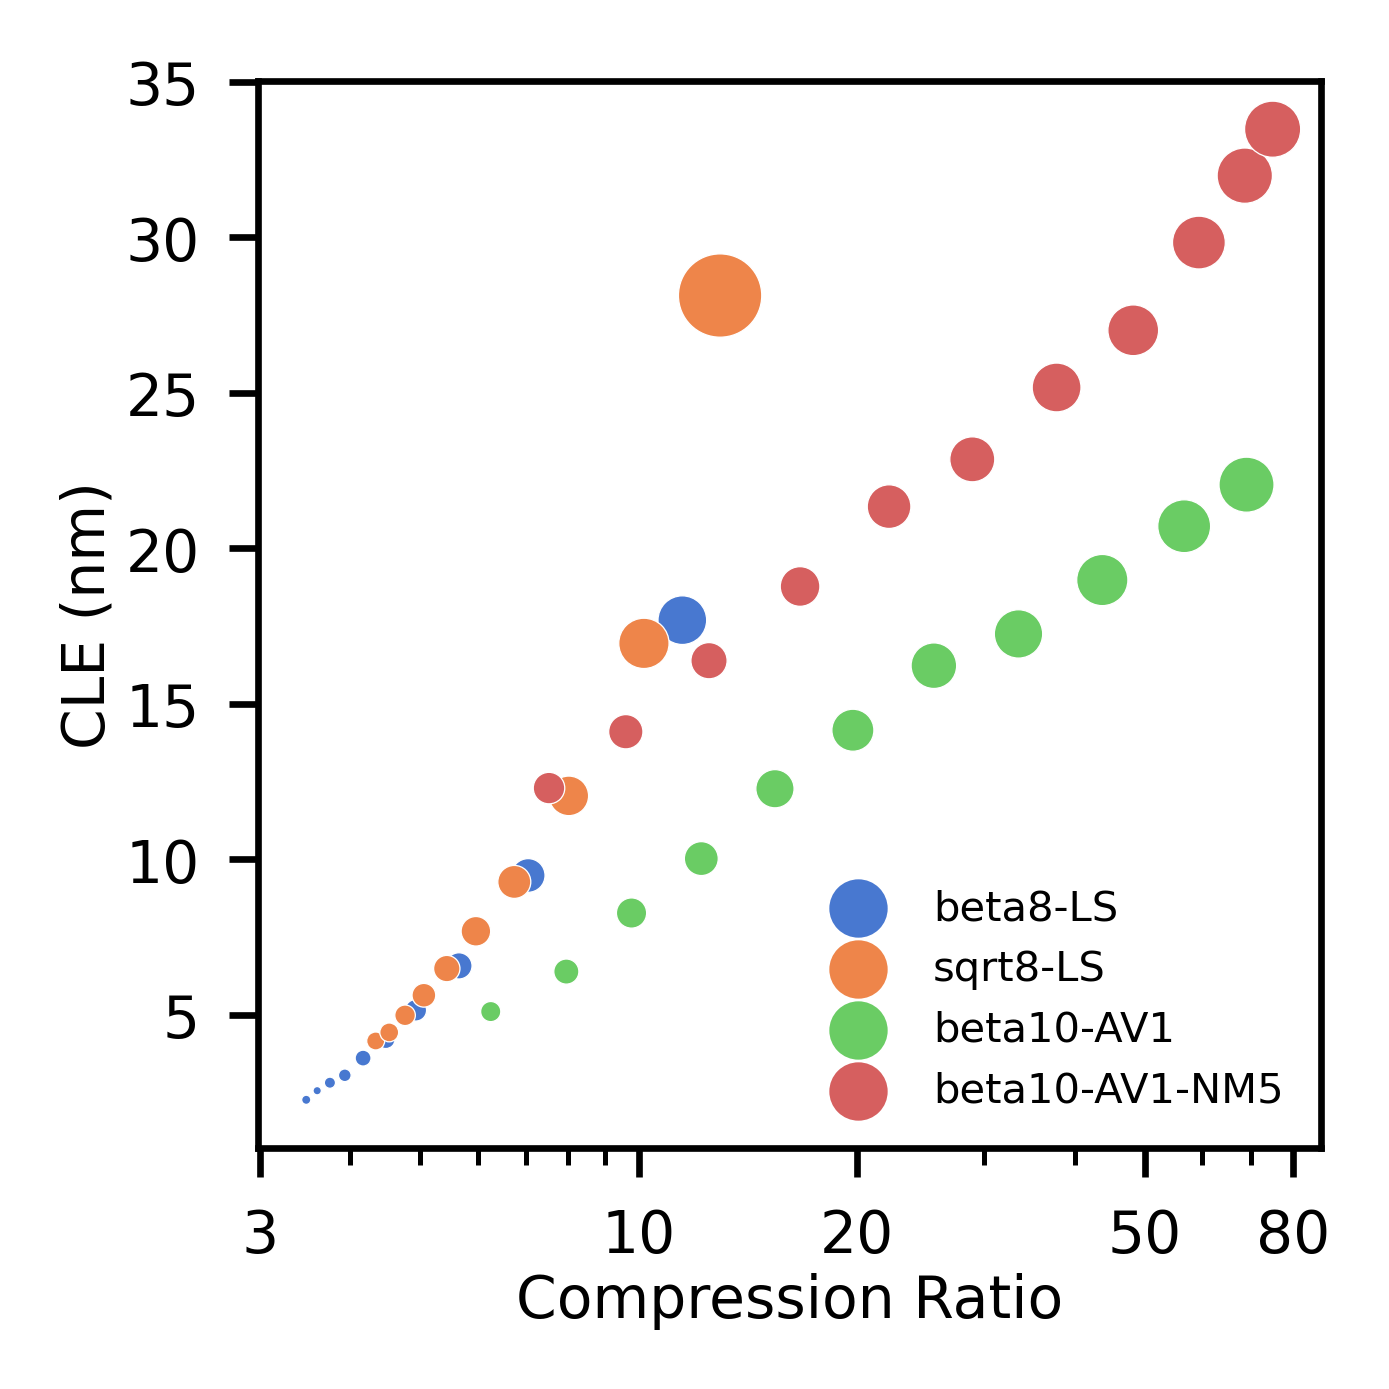

In [4]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2.2,2.2), dpi=600, layout='constrained')
sns.set_palette('muted')

sns.scatterplot(data=data, x="Compression Ratio", y="Localization Error Mean", size="Error Rate", sizes=(1, 100), hue="Compression Type", hue_order=['beta8-LS', 'sqrt8-LS', 'beta10-AV1', 'beta10-AV1-NM5'])
ax.set_ylabel('CLE (nm)')
ax.set_xlabel("Compression Ratio")
ax.set_xscale('log')
ax.legend(loc='lower left', frameon=False, fontsize=5)
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[1:5], labels[1:5], loc='lower right', frameon=False, fontsize=5)
ax.set_xticks([3, 10, 20, 50, 80], [3, 10, 20, 50, 80])

# ax.add_patch(patches.Rectangle((2.5, 0), 7.5, 10, linewidth=0.5, edgecolor='r', facecolor='none'))
# axins = ax.inset_axes([0.14, 0.65, 0.3, 0.3])
# tmp = data[data["Compression Ratio"] <= 10]
# tmp = tmp[tmp["Localization Error Mean"] <= 10]
# sns.scatterplot(ax=axins, data=tmp, x="Compression Ratio", y="Localization Error Mean", size="Error Rate", sizes=(1, 10), hue="Compression Type", hue_order=['beta8-scale', 'sqrt8-scale', 'beta10-AV1'])
# axins.legend().remove()
# axins.set_xlabel('')
# axins.set_ylabel('')
# axins.spines['bottom'].set_color('r')
# axins.spines['top'].set_color('r')
# axins.spines['left'].set_color('r')
# axins.spines['right'].set_color('r')
# axins.set_xticks([3, 4, 5, 6, 7, 8, 9, 10], [3, 4, 5, 6, 7, 8, 9, 10])

fig.savefig('STORM_loc_error_part3.pdf')

In [3]:
# x0, y0, x1, y1 = 8, 8, 8, 22
x0, y0, x1, y1 = 16, 15, 30, 15

Uncompressed Blosc-Zstd
[2034. 1496. 1385. 1925. 2444. 3294. 7209. 6962. 3582. 1813. 1055. 1048.
  786. 1068.  839.]
qscale_0.6_beta beta8-scale0.6
[2012. 1481. 1366. 1907. 2429. 3277. 7207. 6931. 3575. 1802. 1053. 1036.
  782. 1053.  831.]
qscale_0.5_sqrt sqrt8-scale0.5
[1936. 1444. 1296. 1764. 2304. 3136. 7056. 6724. 3364. 1764. 1024. 1024.
  784. 1024.  784.]
beta_Q1 beta10-AV1Q1
[2042. 1489. 1373. 1915. 2438. 3287. 7201. 6943. 3570. 1802. 1053. 1043.
  769. 1053.  838.]
qscale_0.1_sqrt sqrt8-scale0.1
[1600.  900.  900. 1600. 1600. 2500. 6400. 6400. 2500. 1600.  900.  900.
  400.  900.  400.]
beta_Q9 beta10-AV1Q9
[2133. 1512. 1328. 1953. 2519. 3316. 7017. 6870. 3631. 1753. 1022. 1022.
  798. 1053.  858.]


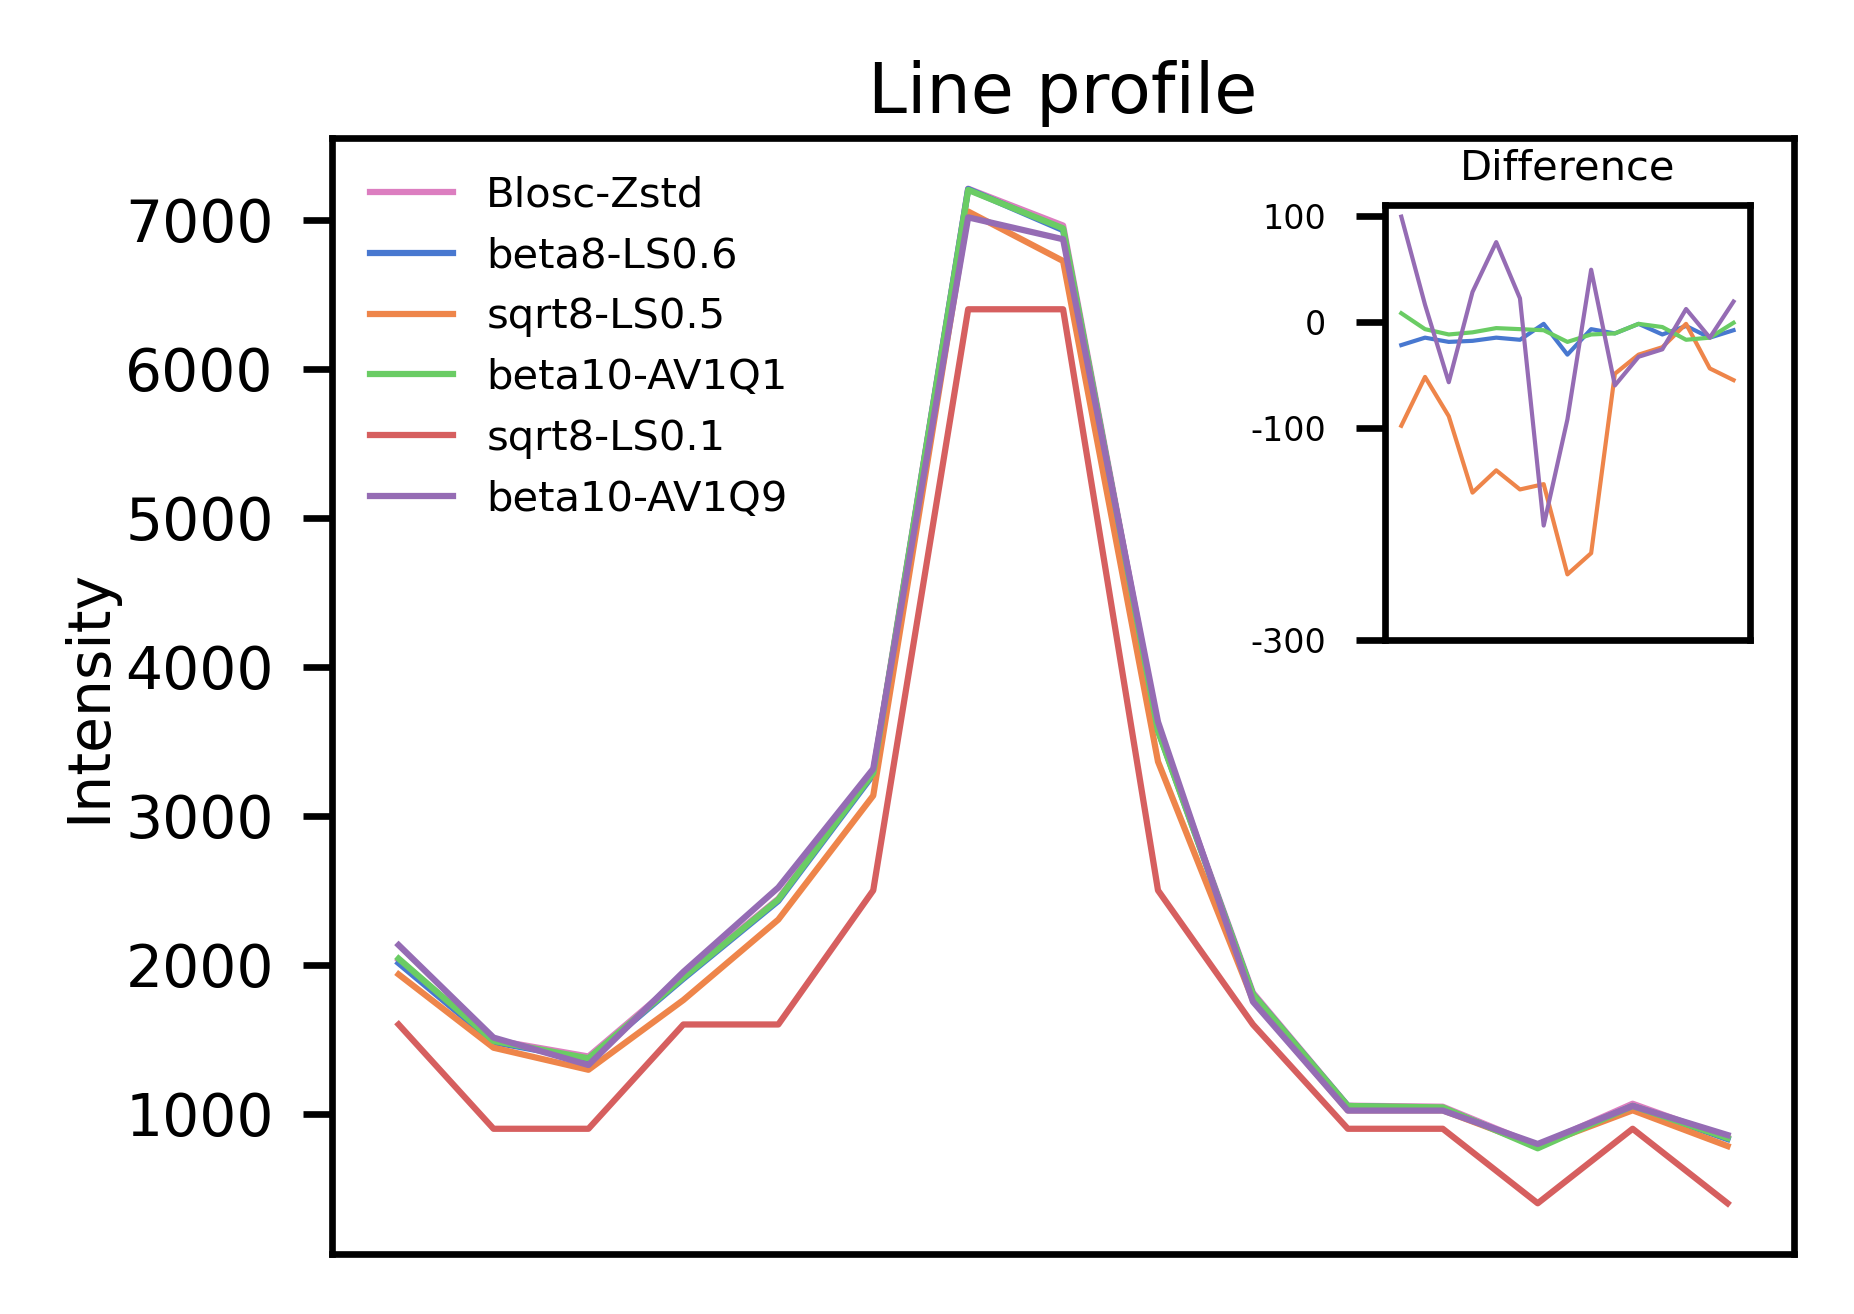

In [12]:
# Make a line with "num" points...
colors = sns.color_palette('muted')
colors = [colors[6],] + [colors[i] for i in range(6)]
# colors = [colors[3], colors[0], colors[1], colors[2], colors[4]]
fig, ax = plt.subplots(1, 1, figsize=(3.1, 2.2), dpi=600, layout='tight')
axins = ax.inset_axes([0.72, 0.55, 0.25, 0.39])
# axins2 = ax.inset_axes([0.72, 0.275, 0.25, 0.25], sharex=axins)
for i, name, label in zip(range(6), ['Uncompressed', 'qscale_0.6_beta', 'qscale_0.5_sqrt', 'beta_Q1', 'qscale_0.1_sqrt', 'beta_Q9'], ['Blosc-Zstd', 'beta8-scale0.6', 'sqrt8-scale0.5', 'beta10-AV1Q1', 'sqrt8-scale0.1', 'beta10-AV1Q9']):
    print(name, label)
    # img_patch = imread(f'quantization/tif/{name}.tif')[0, 206:206+32, 98:98+32]
    img_patch = imread(f'quantization/tif/{name}.tif')[0, 100:100+32, 75:75+32]
    lineIntensity = profile_line(img_patch, (y0, x0), (y1, x1))
    print(lineIntensity)
    if 'scale' in label:
        label = label.replace('scale', 'LS')
    if i == 0:
        raw = lineIntensity
    ax.plot(lineIntensity, color=colors[i], label=label, lw=0.75)
    if i > 0 and label != 'sqrt8-LS0.1':
        axins.plot(lineIntensity - raw, label=label, lw=0.5, color=colors[i])
        # axins2.plot(lineIntensity - raw, label=label, lw=0.5)

ax.set_ylabel('Intensity')
ax.set_xlabel('')
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_title('Line profile')
ax.legend(frameon=False, loc='upper left', fontsize=5)

axins.set_title('Difference', fontsize=5)
axins.set_ylabel('')
axins.set_xlabel('')
axins.set_xticks([])
axins.set_xticklabels([])
# axins.set_yticks([-1000, -200, -100, 0, 100], [-1000, -200, -100, 0, 100], fontsize=4)

# axins2.set_ylabel('')
# axins2.set_xlabel('')
# axins2.set_xticks([])
# axins2.set_xticklabels([])

axins.set_ylim(-300, 110)
# axins2.set_ylim(-1100, -500)

# axins.spines.bottom.set_visible(False)
# axins2.spines.top.set_visible(False)
axins.xaxis.tick_top()
axins.tick_params(labeltop=False)  # don't put tick labels at the top
# axins2.xaxis.tick_bottom()

# d = .5  # proportion of vertical to horizontal extent of the slanted line
# kwargs = dict(marker=[(-1, -d), (1, d)], markersize=4,
#               linestyle="none", color='k', mec='k', mew=1, clip_on=False)
# axins.plot([0, 1], [0, 0], transform=axins.transAxes, **kwargs)
# axins2.plot([0, 1], [1, 1], transform=axins2.transAxes, **kwargs)

axins.set_yticks([-300, -100, 0, 100], [-300, -100, 0, 100], fontsize=4)
# axins2.set_yticks([-1100, -500], [-1100, -500], fontsize=4)

fig.savefig('localization_psf_line_profile.pdf')

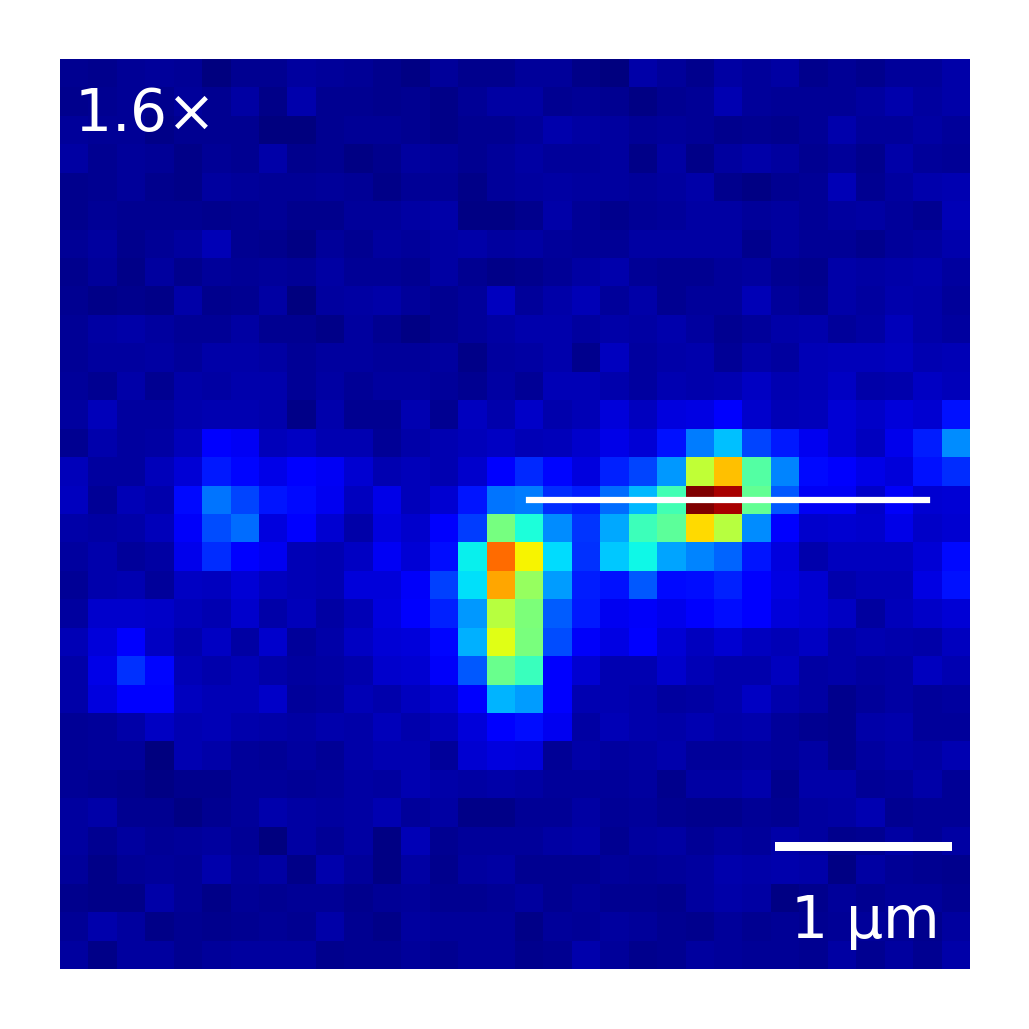

In [13]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(1.6, 1.6), dpi=600, layout='constrained')

# img_patch = imread(f'STORM/tif/Blosc-Zstd.tif')[0, 206:206+32, 98:98+32]
img_patch = imread(f'STORM/tif/Blosc-Zstd.tif')[0, 100:100+32, 75:75+32]
ax.imshow(img_patch, cmap='jet')
ax.annotate('1.6$\\times$', (0, 2), color='w')
ax.plot([x0, x1], [y0, y1], 'w', lw=0.75)

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

ax.add_artist(ScaleBar(160 , 'nm', location='lower right', frameon=False, color='w'))

fig.savefig('STORM_image_patch_blosc.pdf')

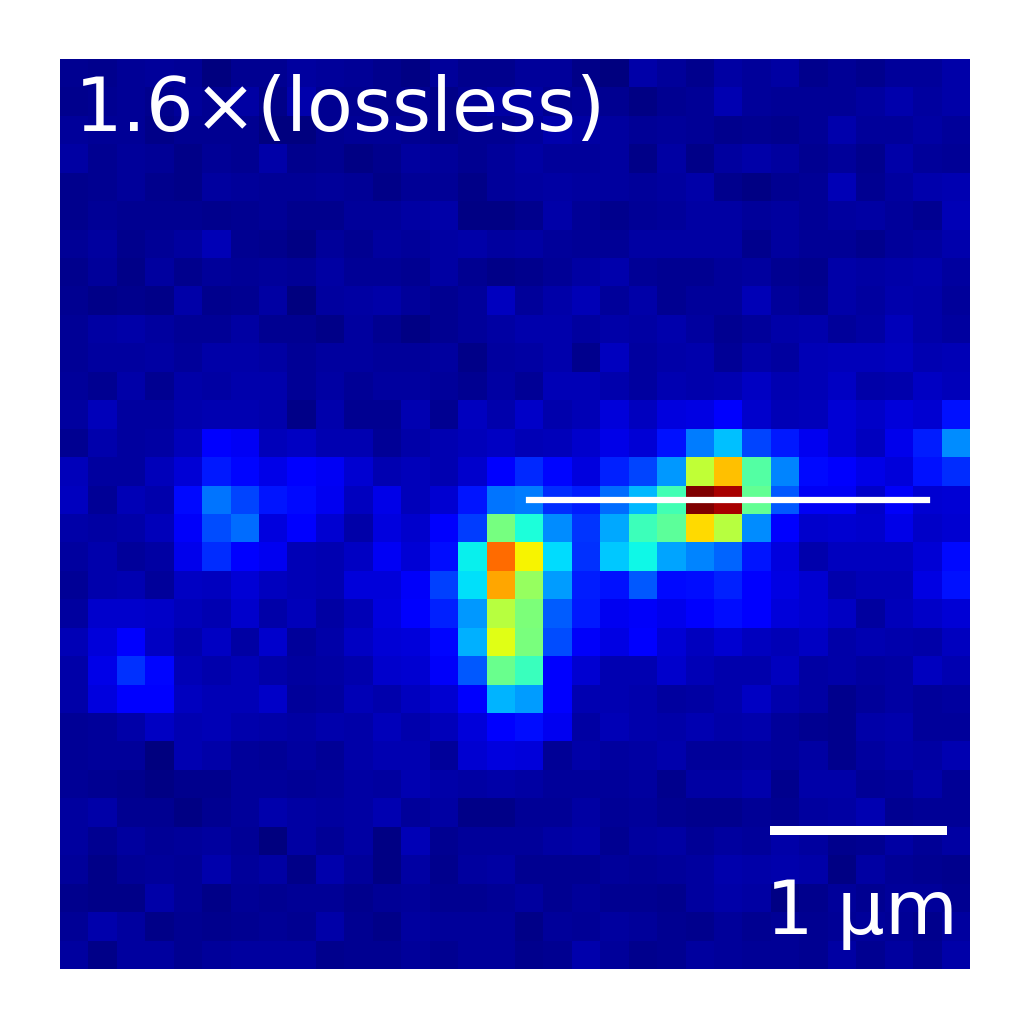

In [33]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(1.6, 1.6), dpi=600, layout='constrained')

# img_patch = imread(f'STORM/tif/Blosc-Zstd.tif')[0, 206:206+32, 98:98+32]
img_patch = imread(f'STORM/tif/Blosc-Zstd.tif')[0, 100:100+32, 75:75+32]
ax.imshow(img_patch, cmap='jet')
ax.annotate('1.6$\\times$(lossless)', (0, 2), color='w', fontsize=9)
ax.plot([x0, x1], [y0, y1], 'w', lw=0.75)

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

ax.add_artist(ScaleBar(160 , 'nm', location='lower right', frameon=False, color='w', font_properties={"size": 9}))

fig.savefig('STORM_image_patch_blosc.pdf')

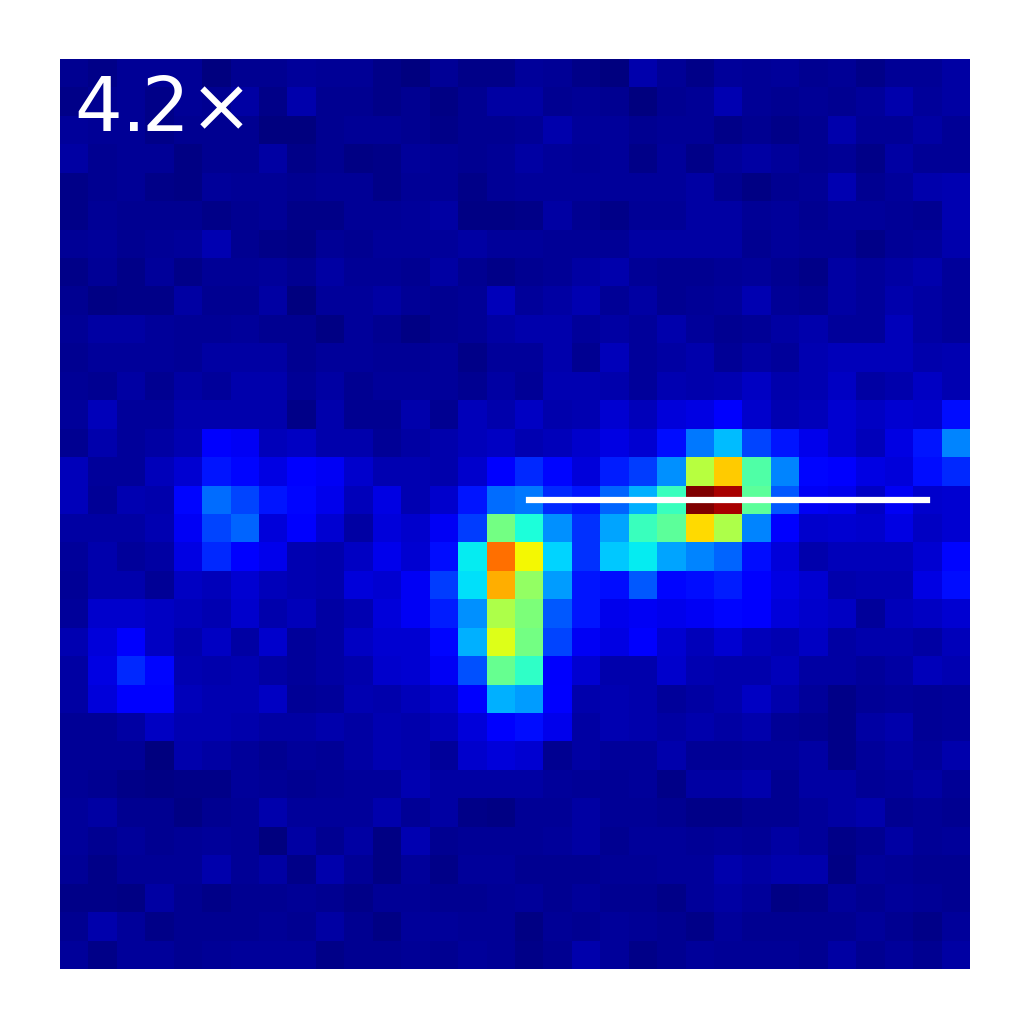

In [30]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(1.6, 1.6), dpi=600, layout='constrained')

# img_patch = imread(f'quantization/tif/qscale_0.6_beta8.tif')[0, 206:206+32, 98:98+32]
img_patch = imread(f'quantization/tif/qscale_0.6_beta8.tif')[0, 100:100+32, 75:75+32]
ax.imshow(img_patch, cmap='jet')
ax.annotate('4.2$\\times$', (0, 2), color='w', fontsize=9)
ax.plot([x0, x1], [y0, y1], 'w', lw=0.75)

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

# ax.add_artist(ScaleBar(160 , 'nm', location='lower right', frameon=False, color='w'))

fig.savefig('STORM_image_patch_blosc_beta8_scale0.6.pdf')

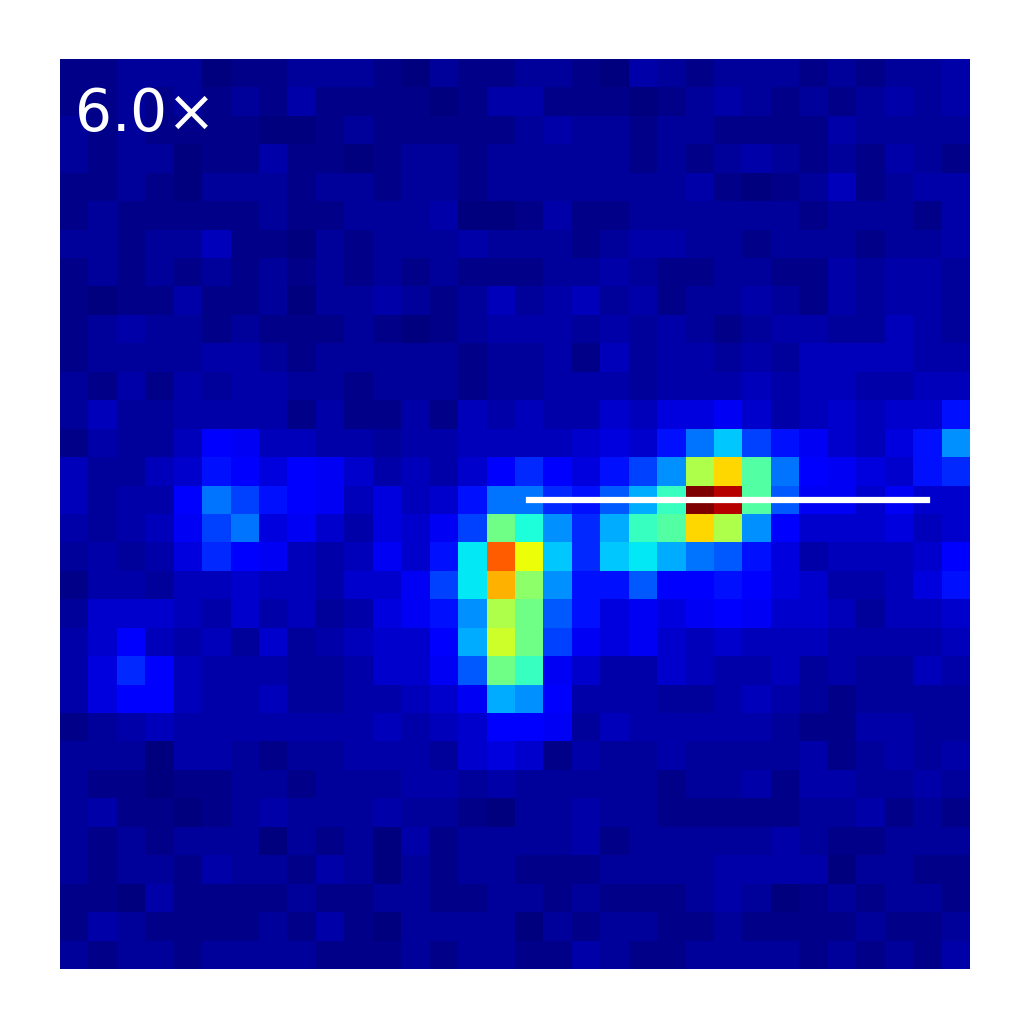

In [15]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(1.6, 1.6), dpi=600, layout='constrained')

# img_patch = imread(f'quantization/tif/qscale_0.5_sqrt.tif')[0, 206:206+32, 98:98+32]
img_patch = imread(f'quantization/tif/qscale_0.5_sqrt.tif')[0, 100:100+32, 75:75+32]
ax.imshow(img_patch, cmap='jet')
ax.annotate('6.0$\\times$', (0, 2), color='w')
ax.plot([x0, x1], [y0, y1], 'w', lw=0.75)

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

# ax.add_artist(ScaleBar(160 , 'nm', location='lower right', frameon=False, color='w'))

fig.savefig('STORM_image_patch_blosc_sqrt8_scale0.5.pdf')

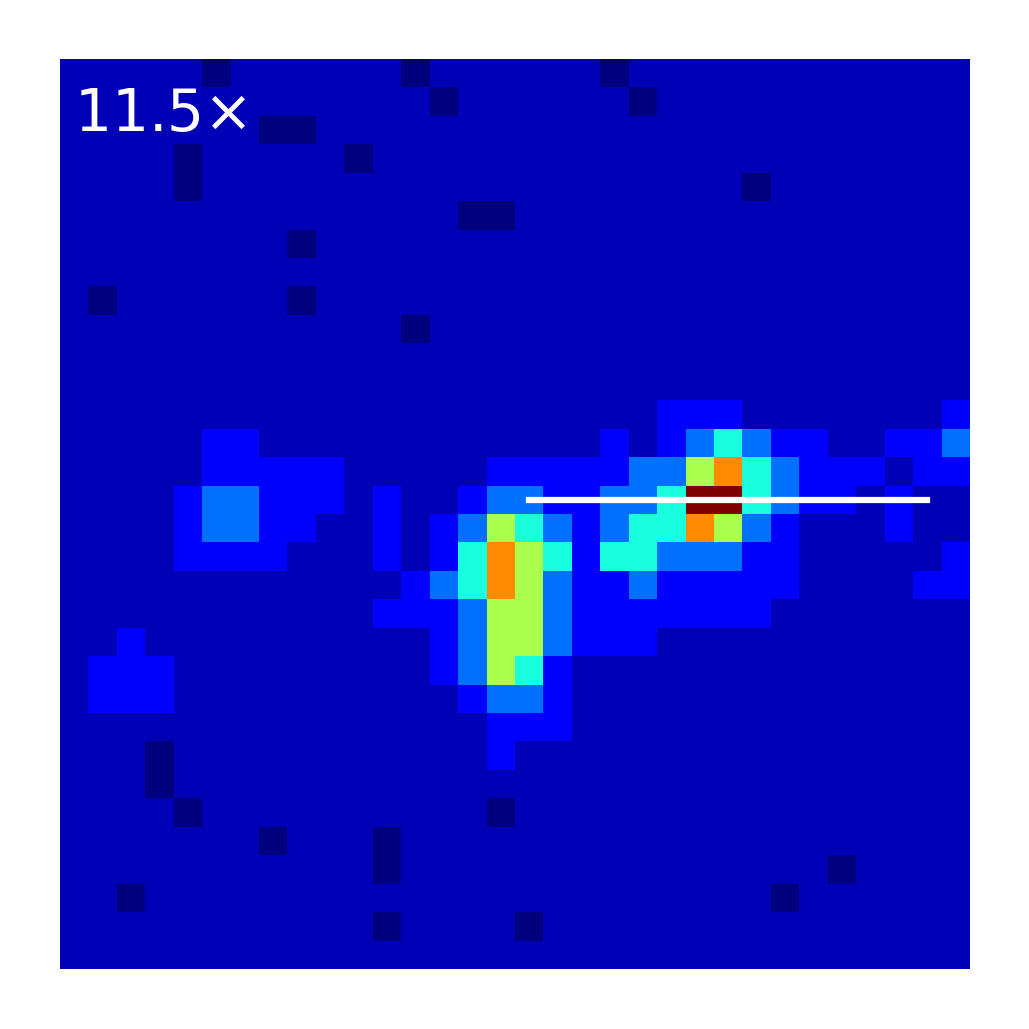

In [16]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(1.6, 1.6), dpi=600, layout='constrained')

# img_patch = imread(f'quantization/tif/qscale_0.1_sqrt.tif')[0, 206:206+32, 98:98+32]
img_patch = imread(f'quantization/tif/qscale_0.1_sqrt.tif')[0, 100:100+32, 75:75+32]
ax.imshow(img_patch, cmap='jet')
ax.annotate('11.5$\\times$', (0, 2), color='w')
ax.plot([x0, x1], [y0, y1], 'w', lw=0.75)

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

# ax.add_artist(ScaleBar(160 , 'nm', location='lower right', frameon=False, color='w'))

fig.savefig('STORM_image_patch_blosc_sqrt8_scale0.1.pdf')

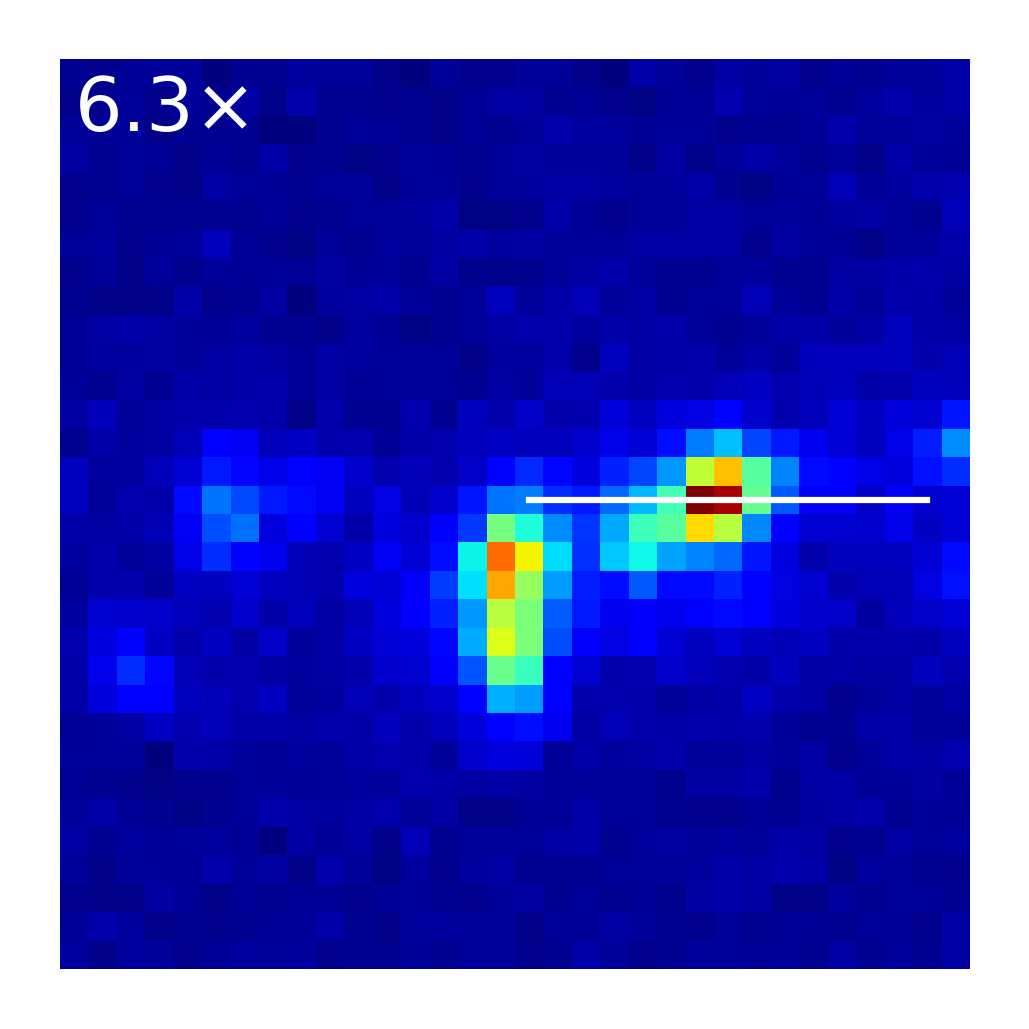

In [31]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(1.6, 1.6), dpi=600, layout='constrained')

# img_patch = imread(f'quantization/tif/beta_Q1.tif')[0, 206:206+32, 98:98+32]
img_patch = imread(f'quantization/tif/beta_Q1.tif')[0, 100:100+32, 75:75+32]
ax.imshow(img_patch, cmap='jet')
ax.annotate('6.3$\\times$', (0, 2), color='w', fontsize=9)
ax.plot([x0, x1], [y0, y1], 'w', lw=0.75)

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

# ax.add_artist(ScaleBar(160 , 'nm', location='lower right', frameon=False, color='w'))

fig.savefig('STORM_image_patch_beta10_AV1Q1.pdf')

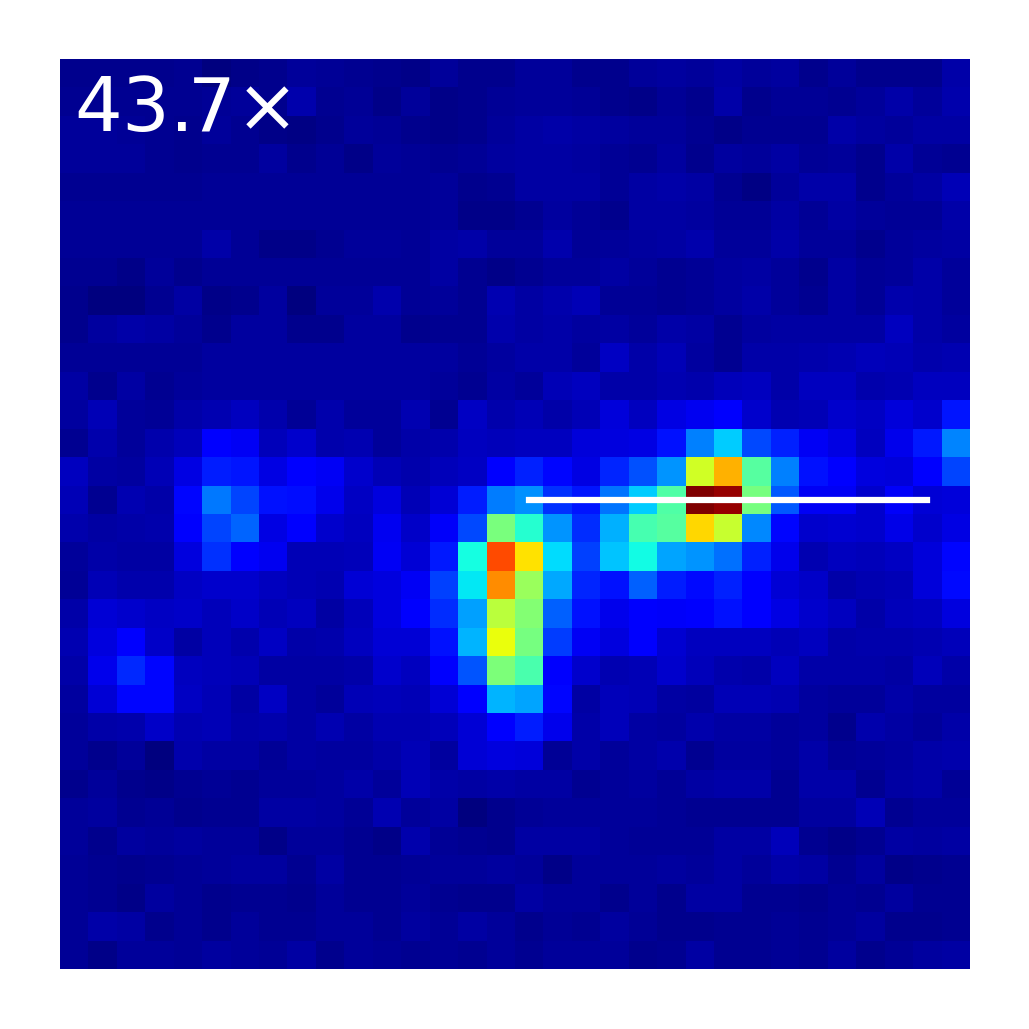

In [32]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(1.6, 1.6), dpi=600, layout='constrained')

# img_patch = imread(f'quantization/tif/beta_Q9.tif')[0, 206:206+32, 98:98+32]
img_patch = imread(f'quantization/tif/beta_Q9.tif')[0, 100:100+32, 75:75+32]
ax.imshow(img_patch, cmap='jet')
ax.annotate('43.7$\\times$', (0, 2), color='w', fontsize=9)
ax.plot([x0, x1], [y0, y1], 'w', lw=0.75)

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

# ax.add_artist(ScaleBar(160 , 'nm', location='lower right', frameon=False, color='w'))

fig.savefig('STORM_image_patch_beta10_AV1Q9.pdf')

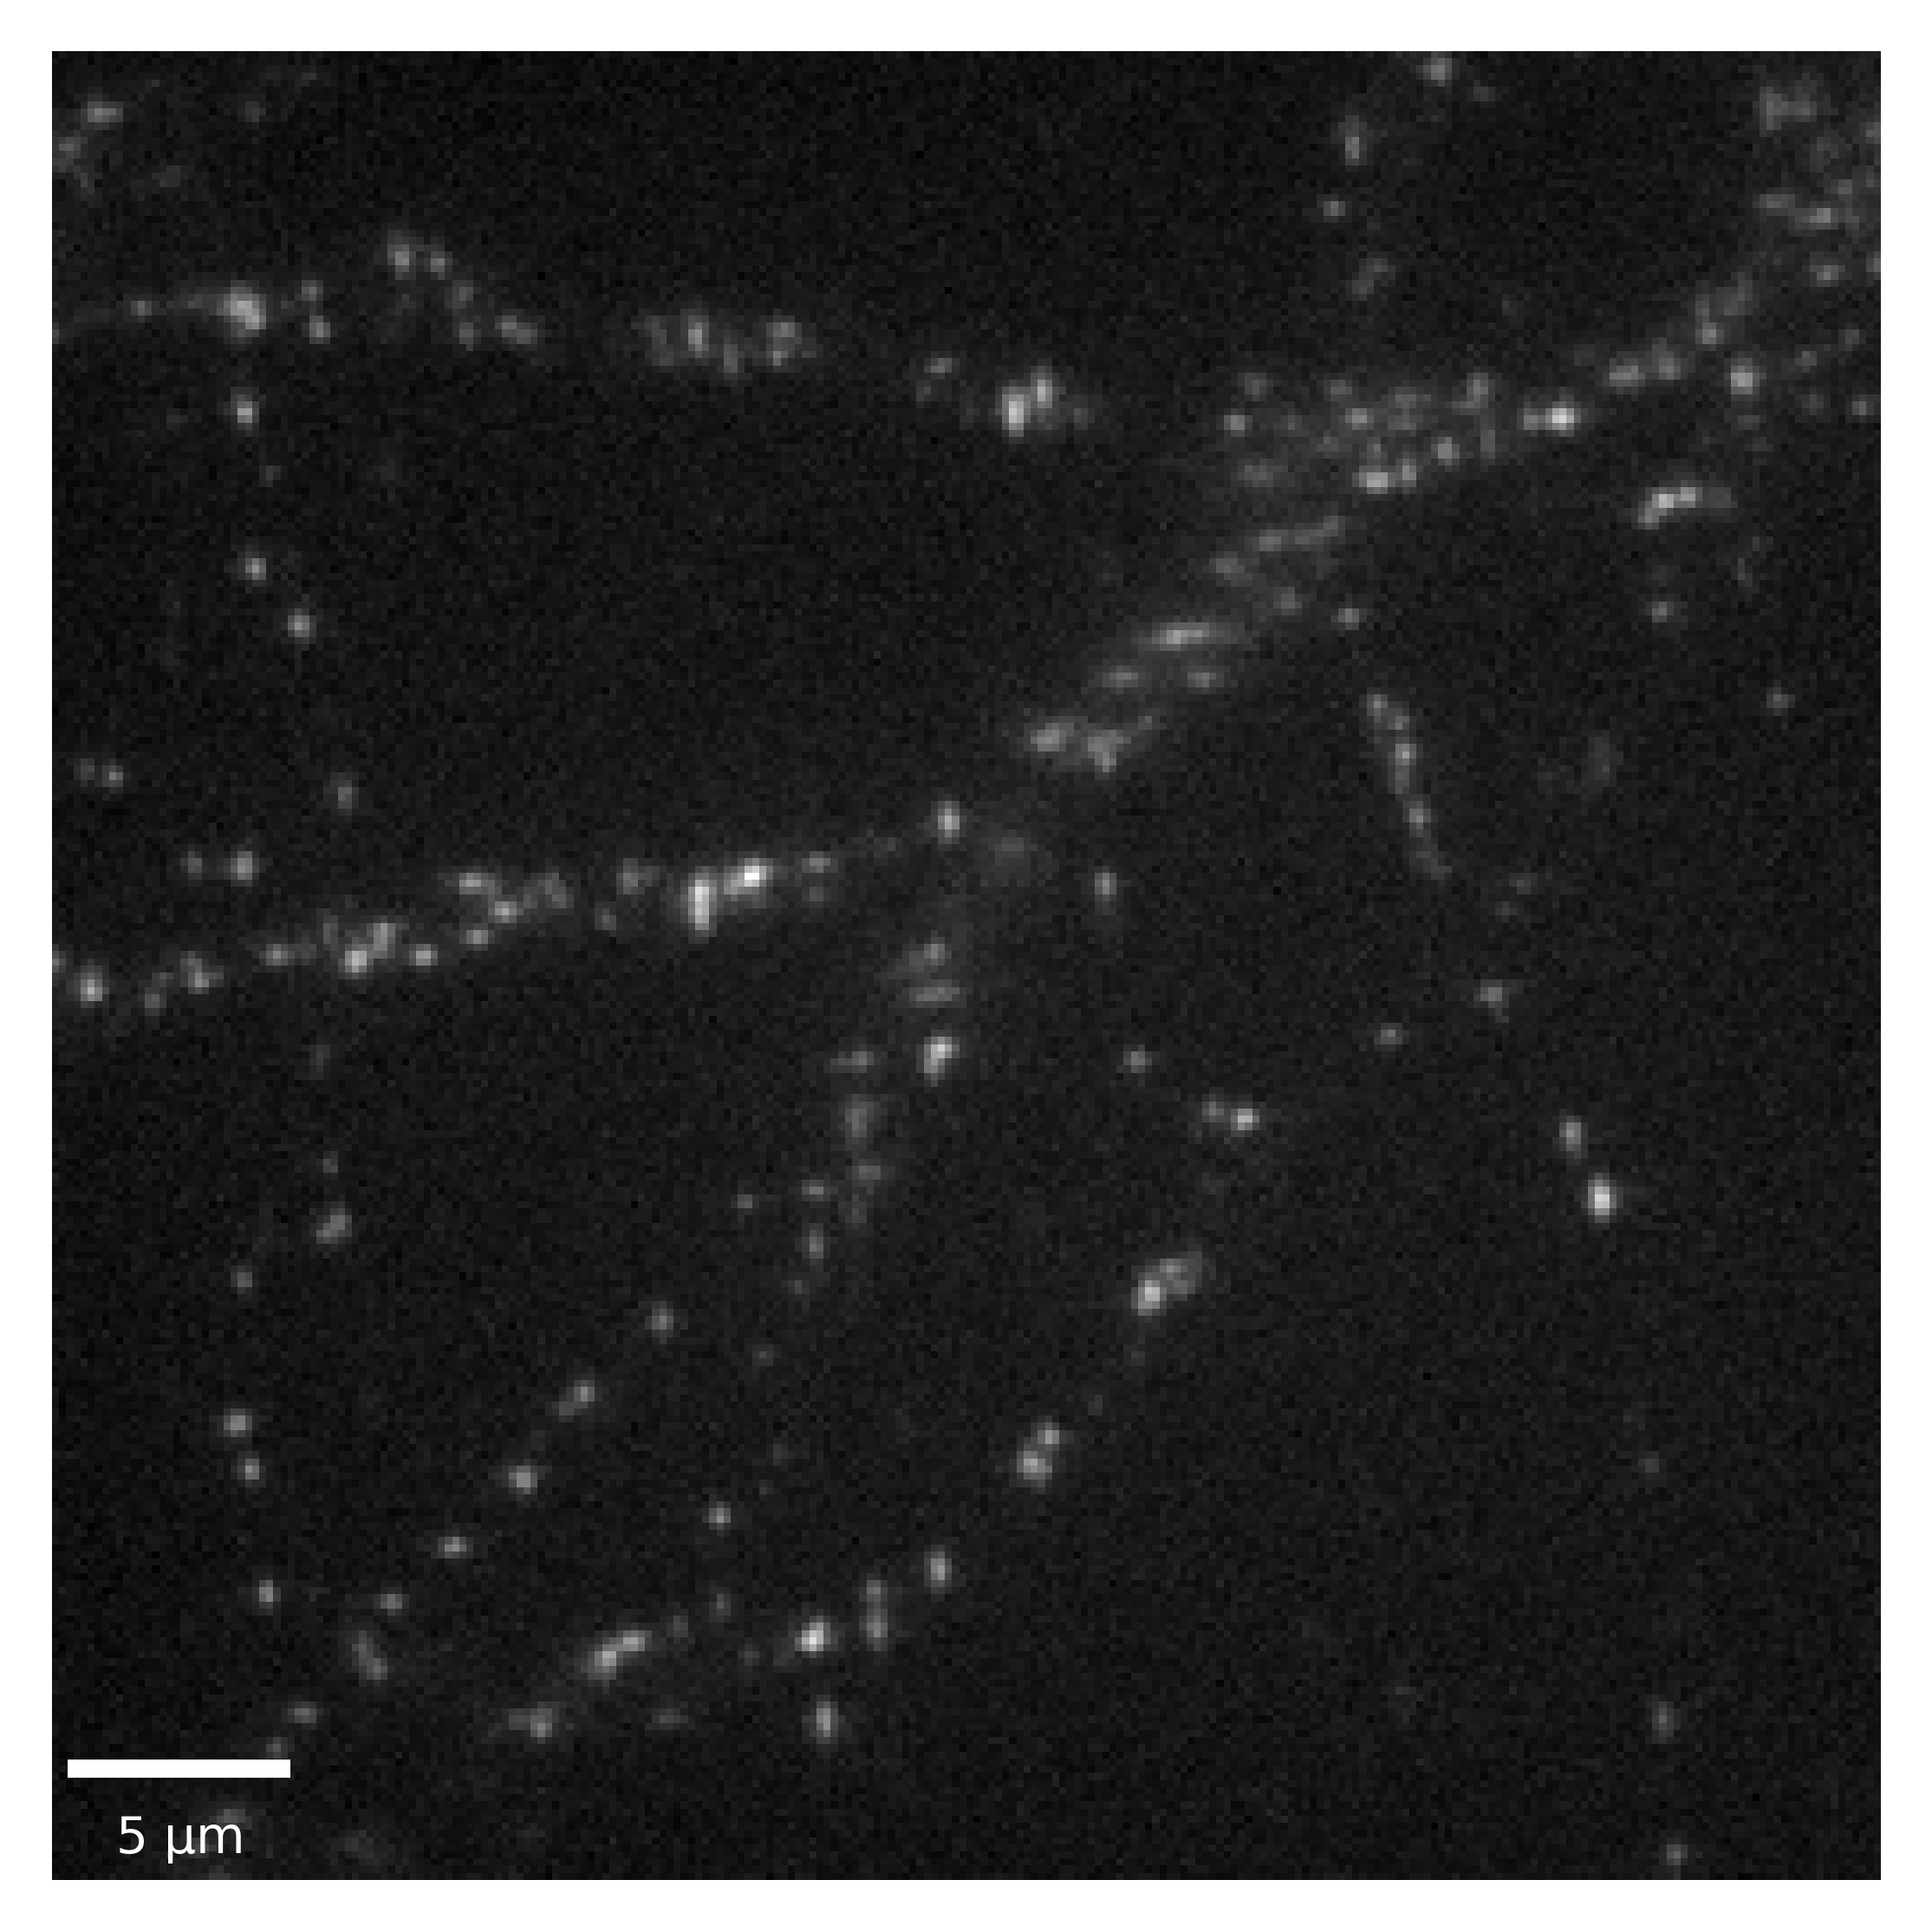

In [19]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3.6,3.6), dpi=600, layout='constrained')
img = imread('quantization/tif/Uncompressed.tif')
img = img[0, ...]
img = img * 1.0 / img.max()
img = np.power(img, 0.5)
ax.imshow(img, cmap='gray')
# ax.annotate('1.6$\\times$', (5, 10), color='w')

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

ax.add_artist(ScaleBar(160 , 'nm', location='lower left', frameon=False, color='w'))

fig.savefig('STORM_blosc_raw.pdf')

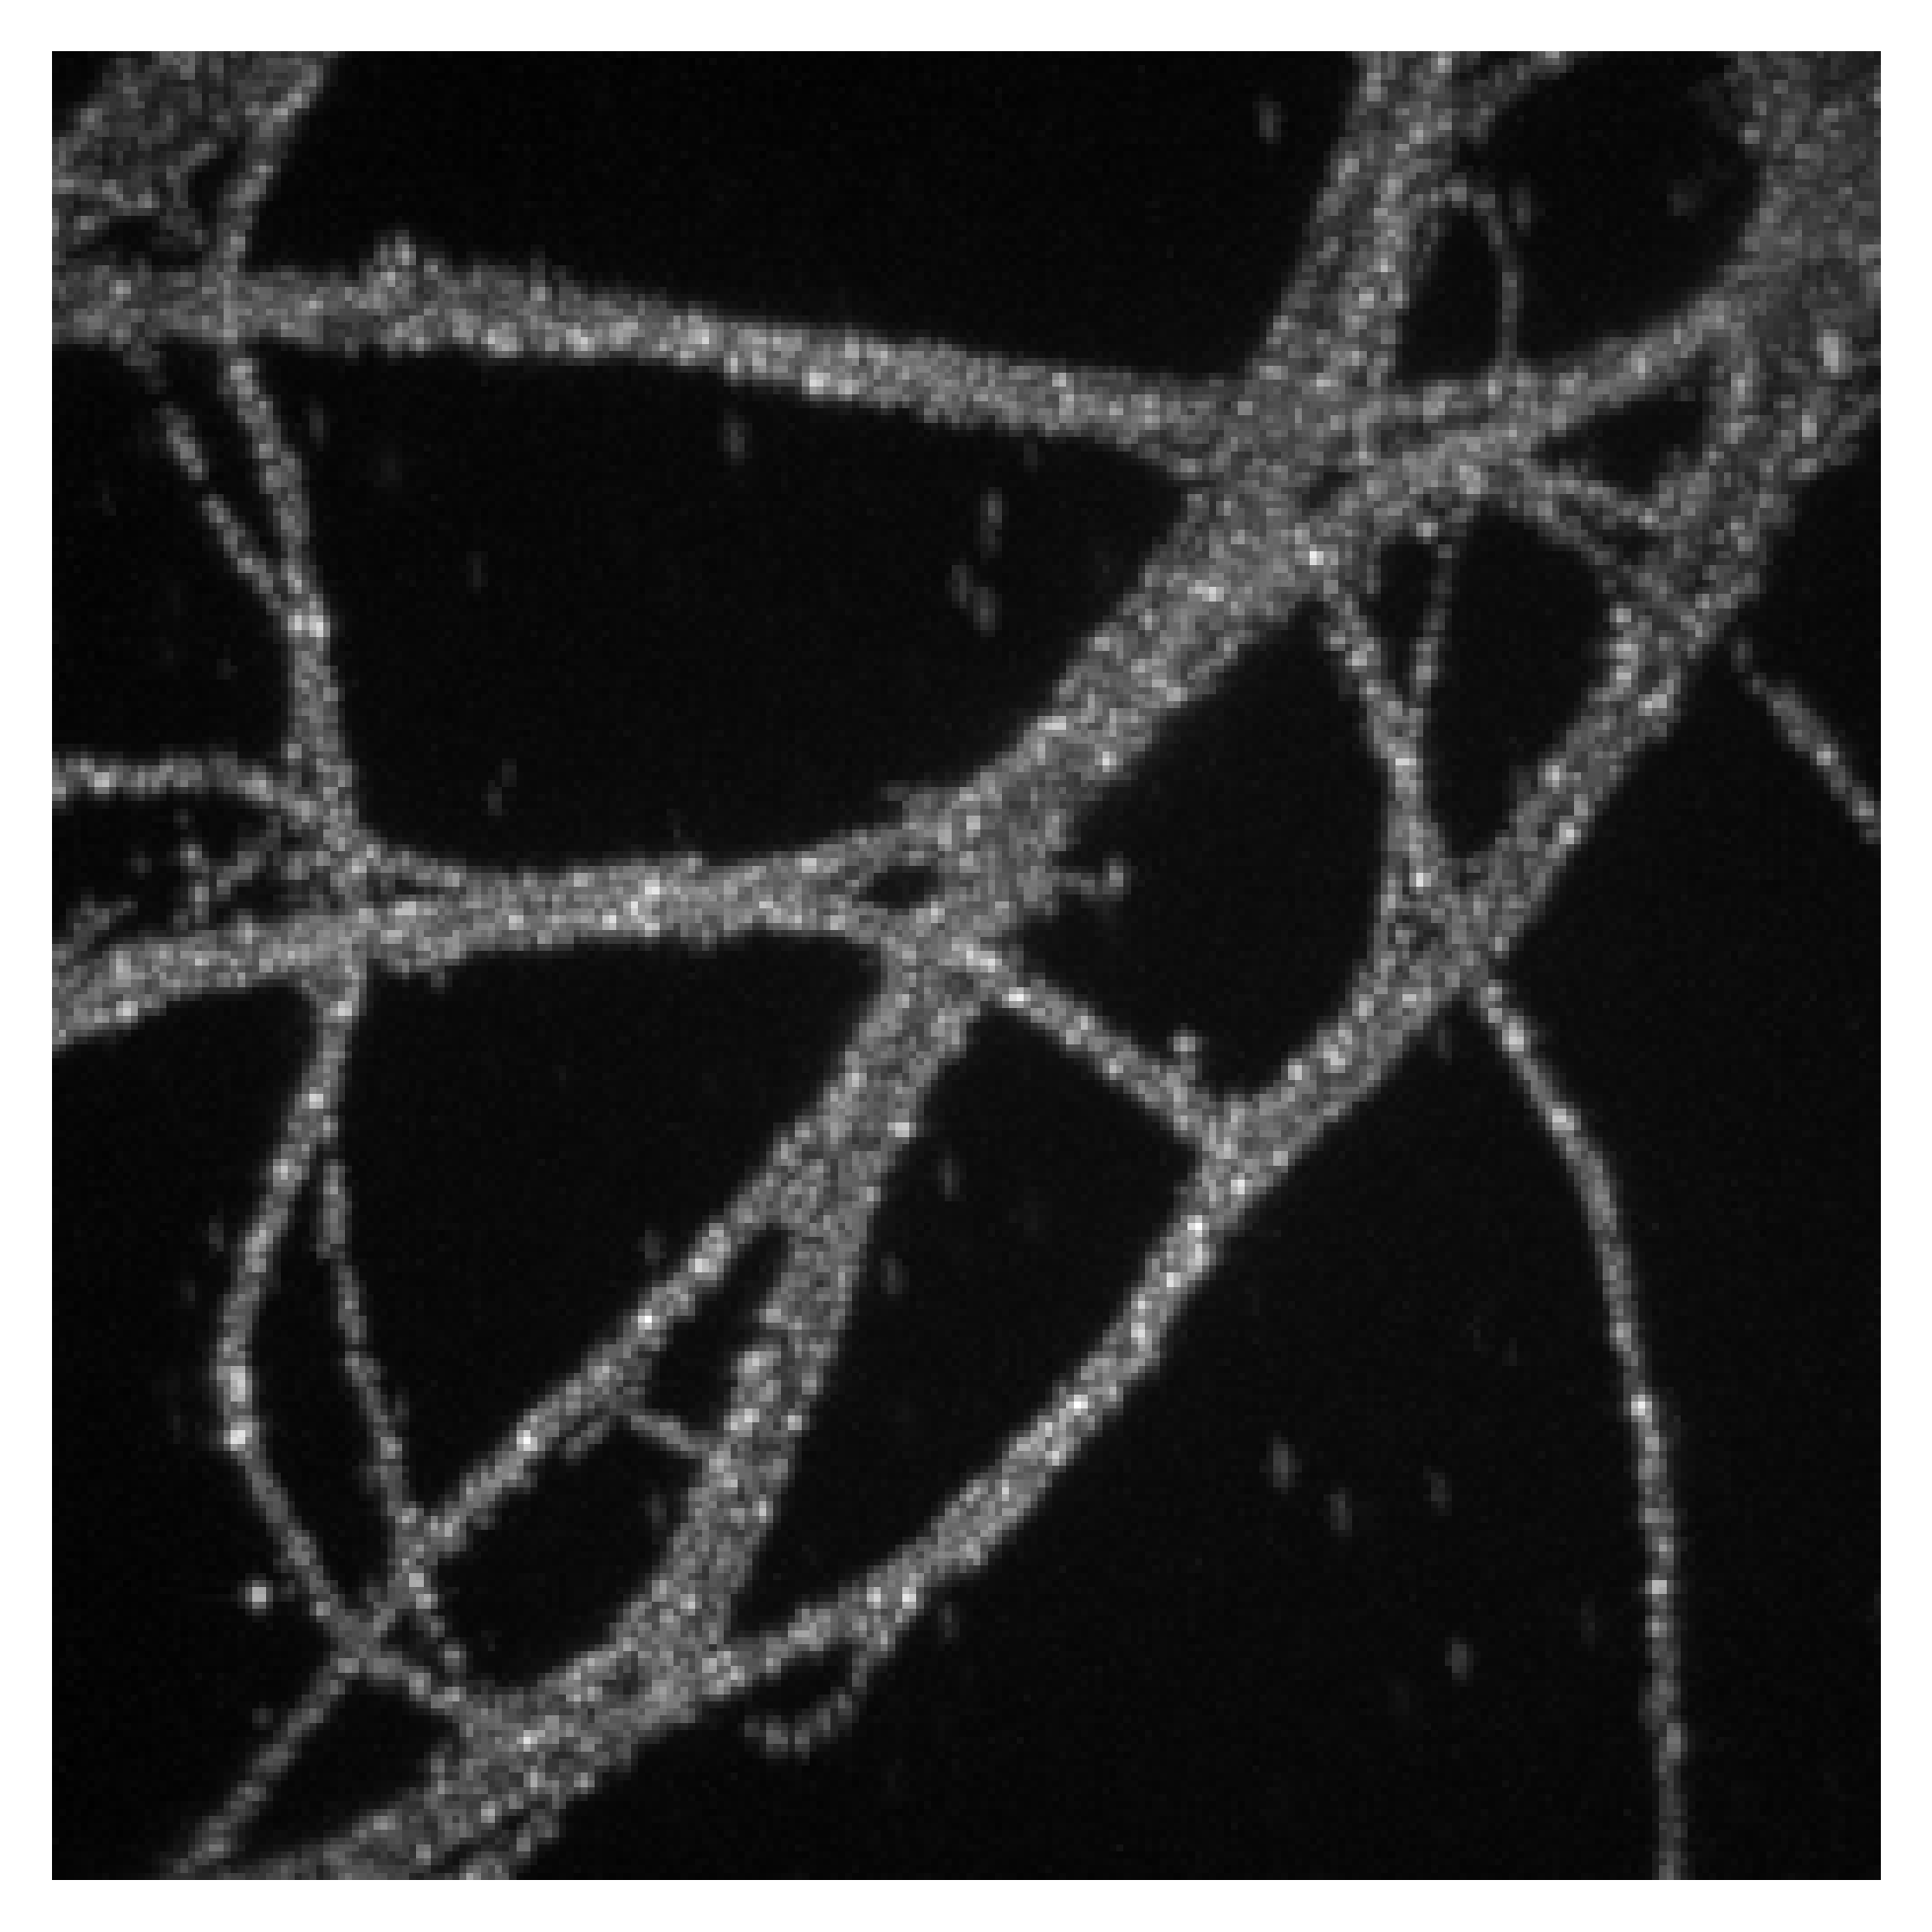

In [20]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3.6,3.6), dpi=600, layout='constrained')
img = imread('quantization/tif/Uncompressed.tif')
img = np.amax(img, axis=0)
img = img / img.max()
img = np.power(img, 0.5)
ax.imshow(img, cmap='gray')
# ax.annotate('1.6$\\times$', (5, 10), color='w')

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

# ax.add_artist(ScaleBar(160 , 'nm', location='lower left', frameon=False, color='w'))

fig.savefig('STORM_blosc_maxImum_projection.pdf')

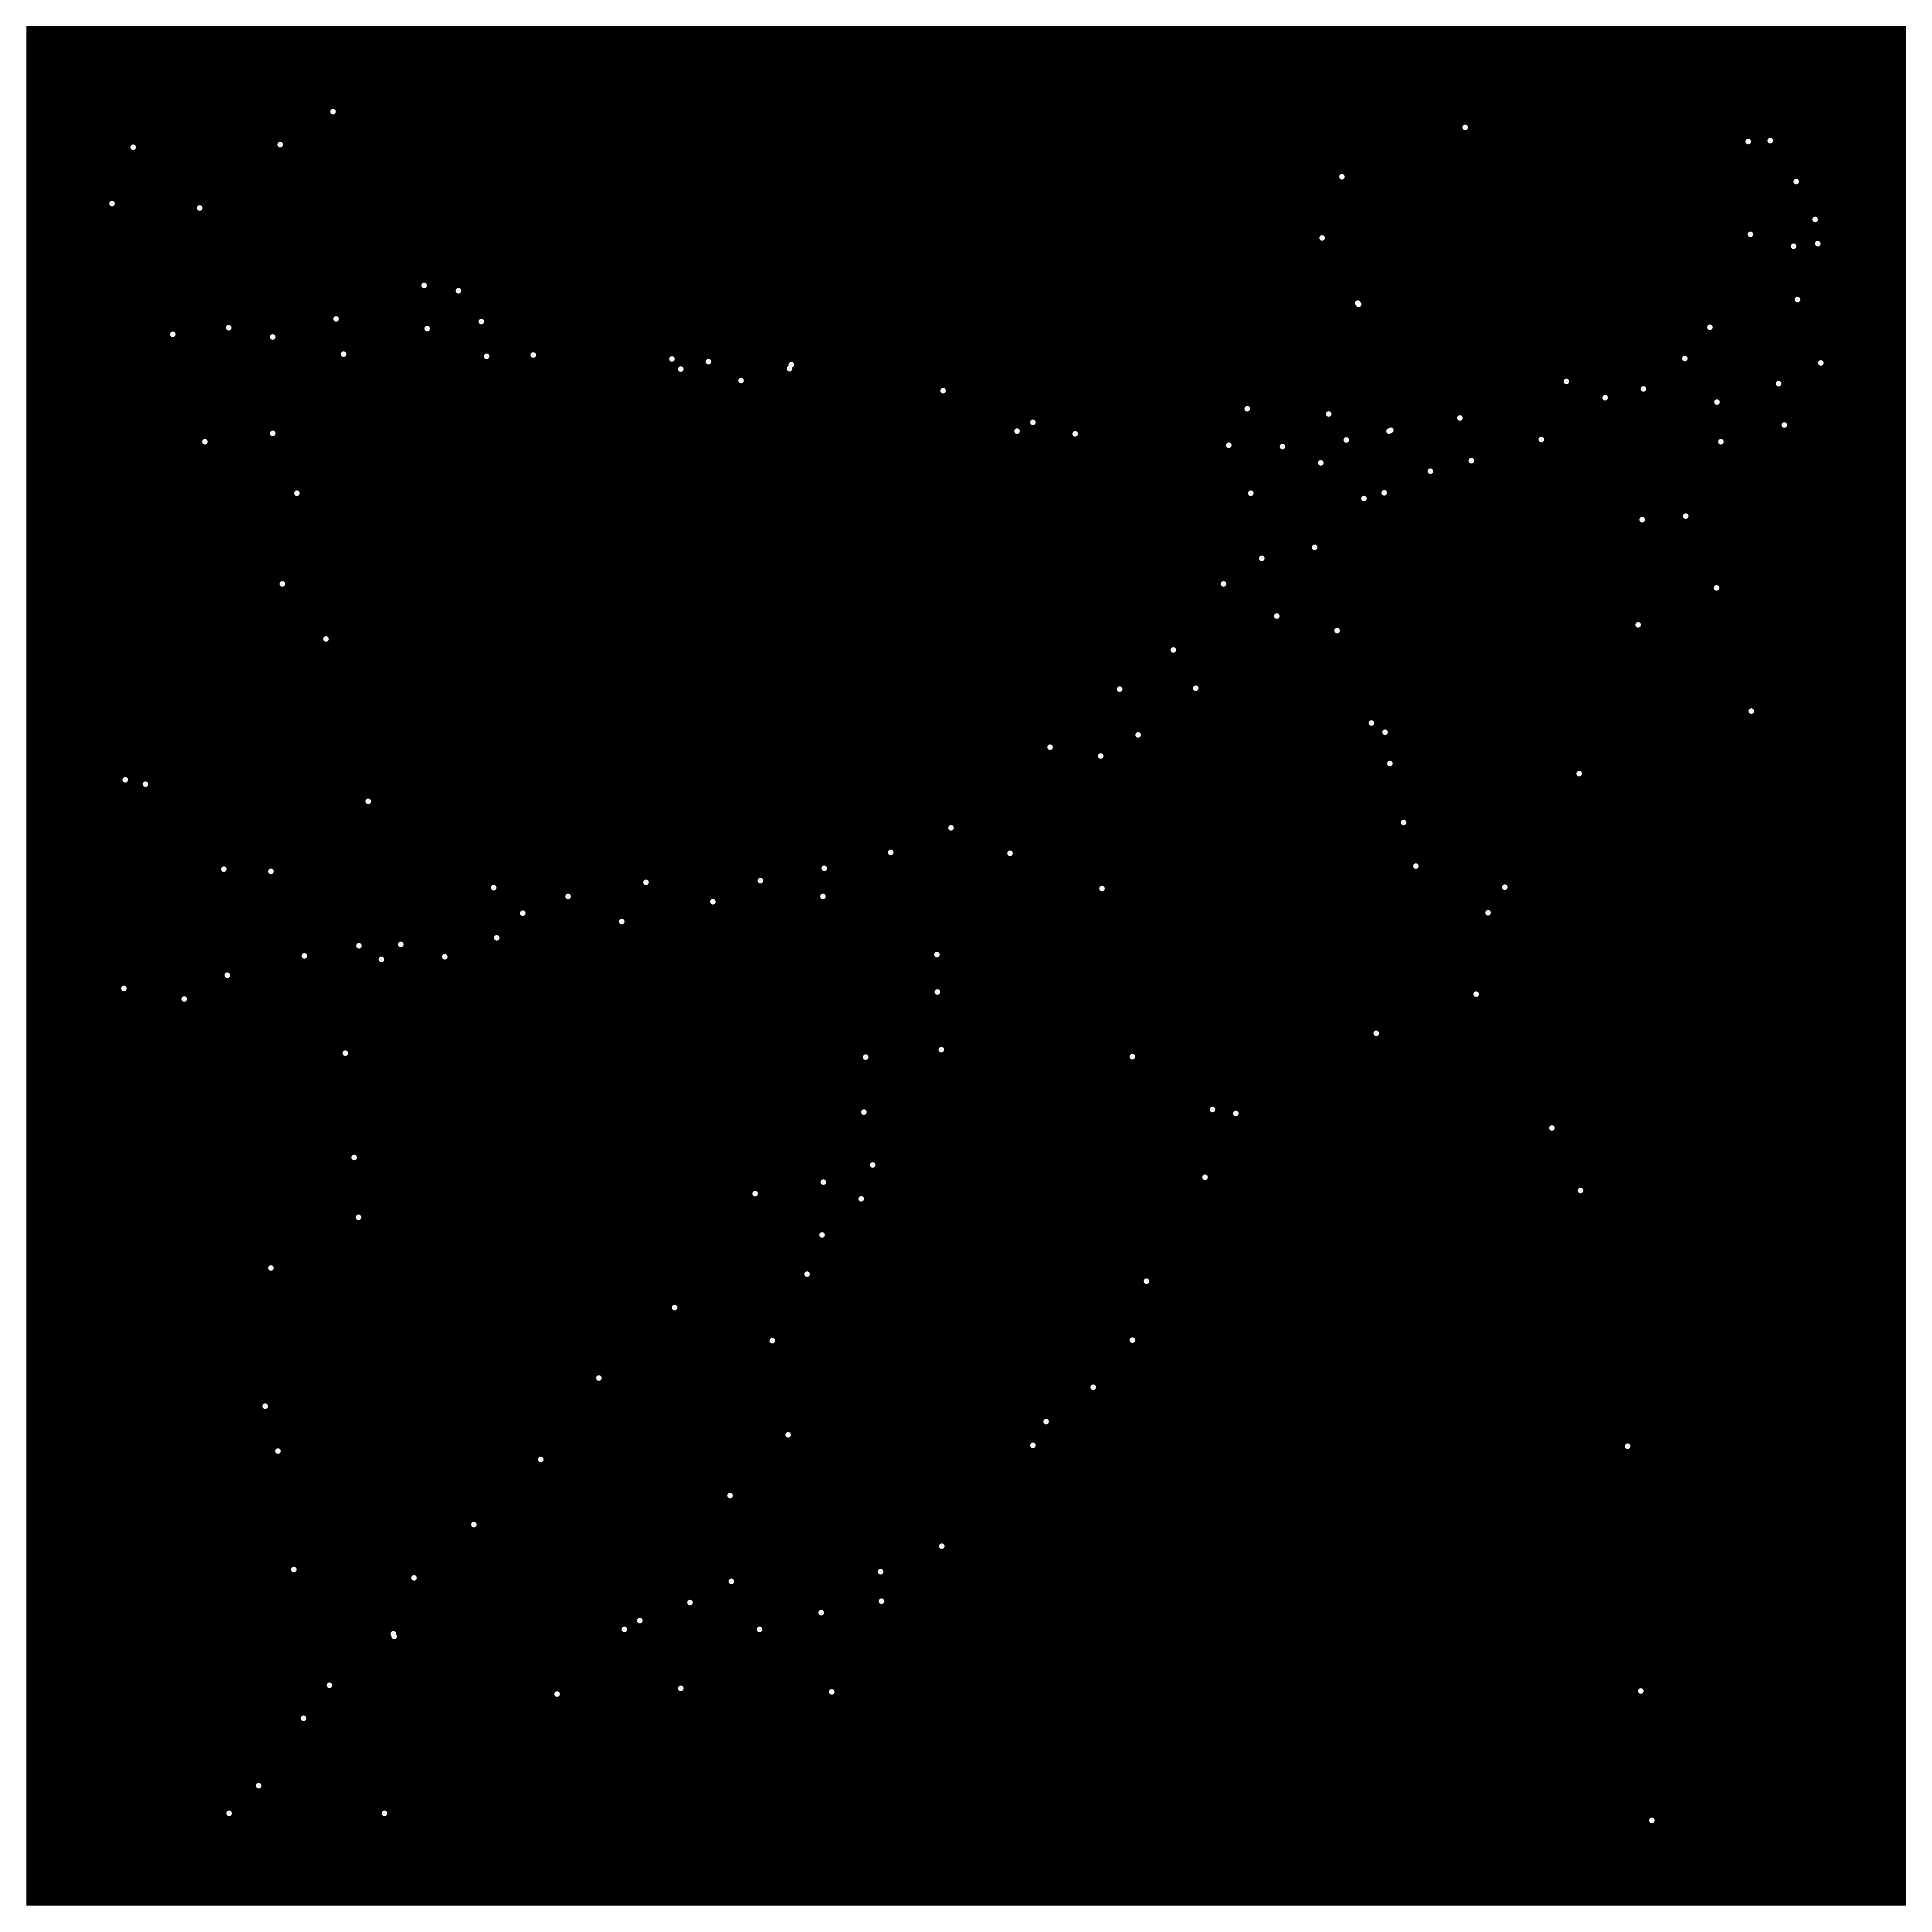

In [21]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3.6*2,3.6*2), dpi=600, layout='constrained')
df = pd.read_csv('quantization/results_10302023/Uncompressed.csv')
df = df[df['frame'] == 1]
ax.scatter(df['x [nm]'] / 160, 256 - df['y [nm]'] / 160, s=0.25, c='w')
ax.set_facecolor('k')

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

fig.savefig('STORM_blosc_single_plane_fitting.pdf')

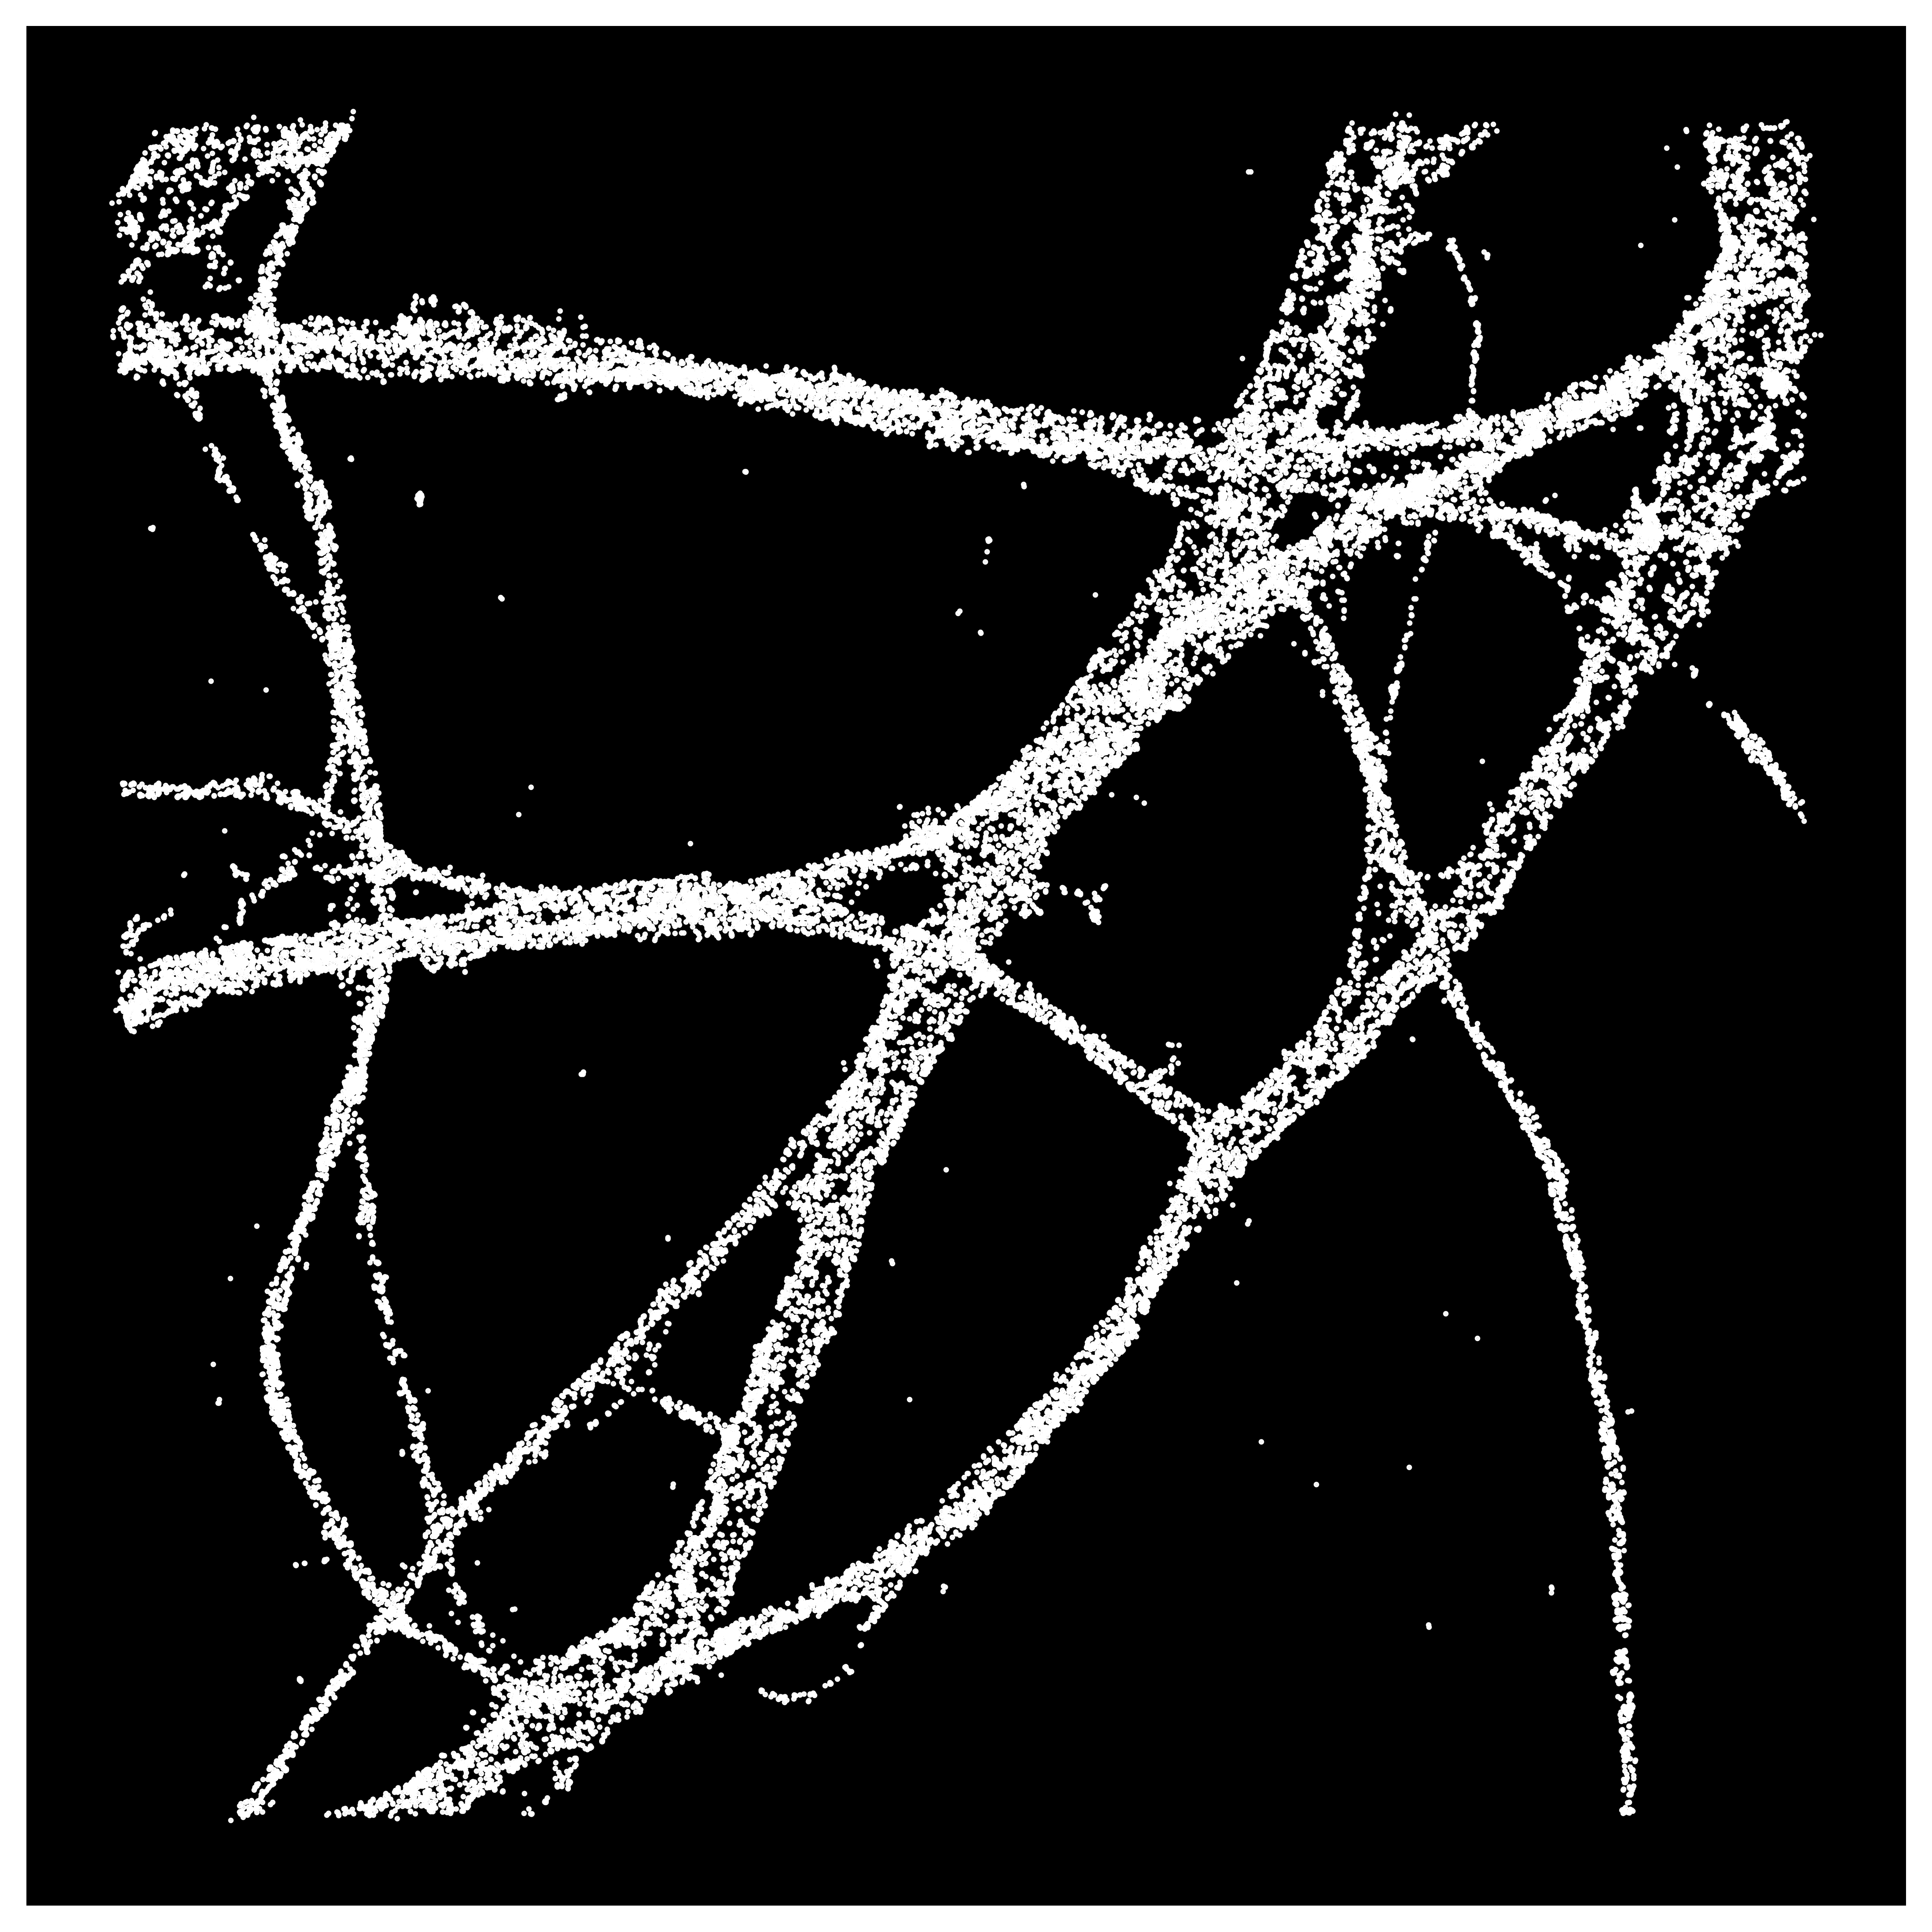

In [22]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3.6*2,3.6*2), dpi=600, layout='constrained')
df = pd.read_csv('quantization/results_10302023/Uncompressed.csv')
ax.scatter(df['x [nm]'] / 160, 256 - df['y [nm]'] / 160, s=0.25, c='w')
ax.set_facecolor('k')

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

fig.savefig('STORM_blosc_maximum_projection_fitting.pdf')

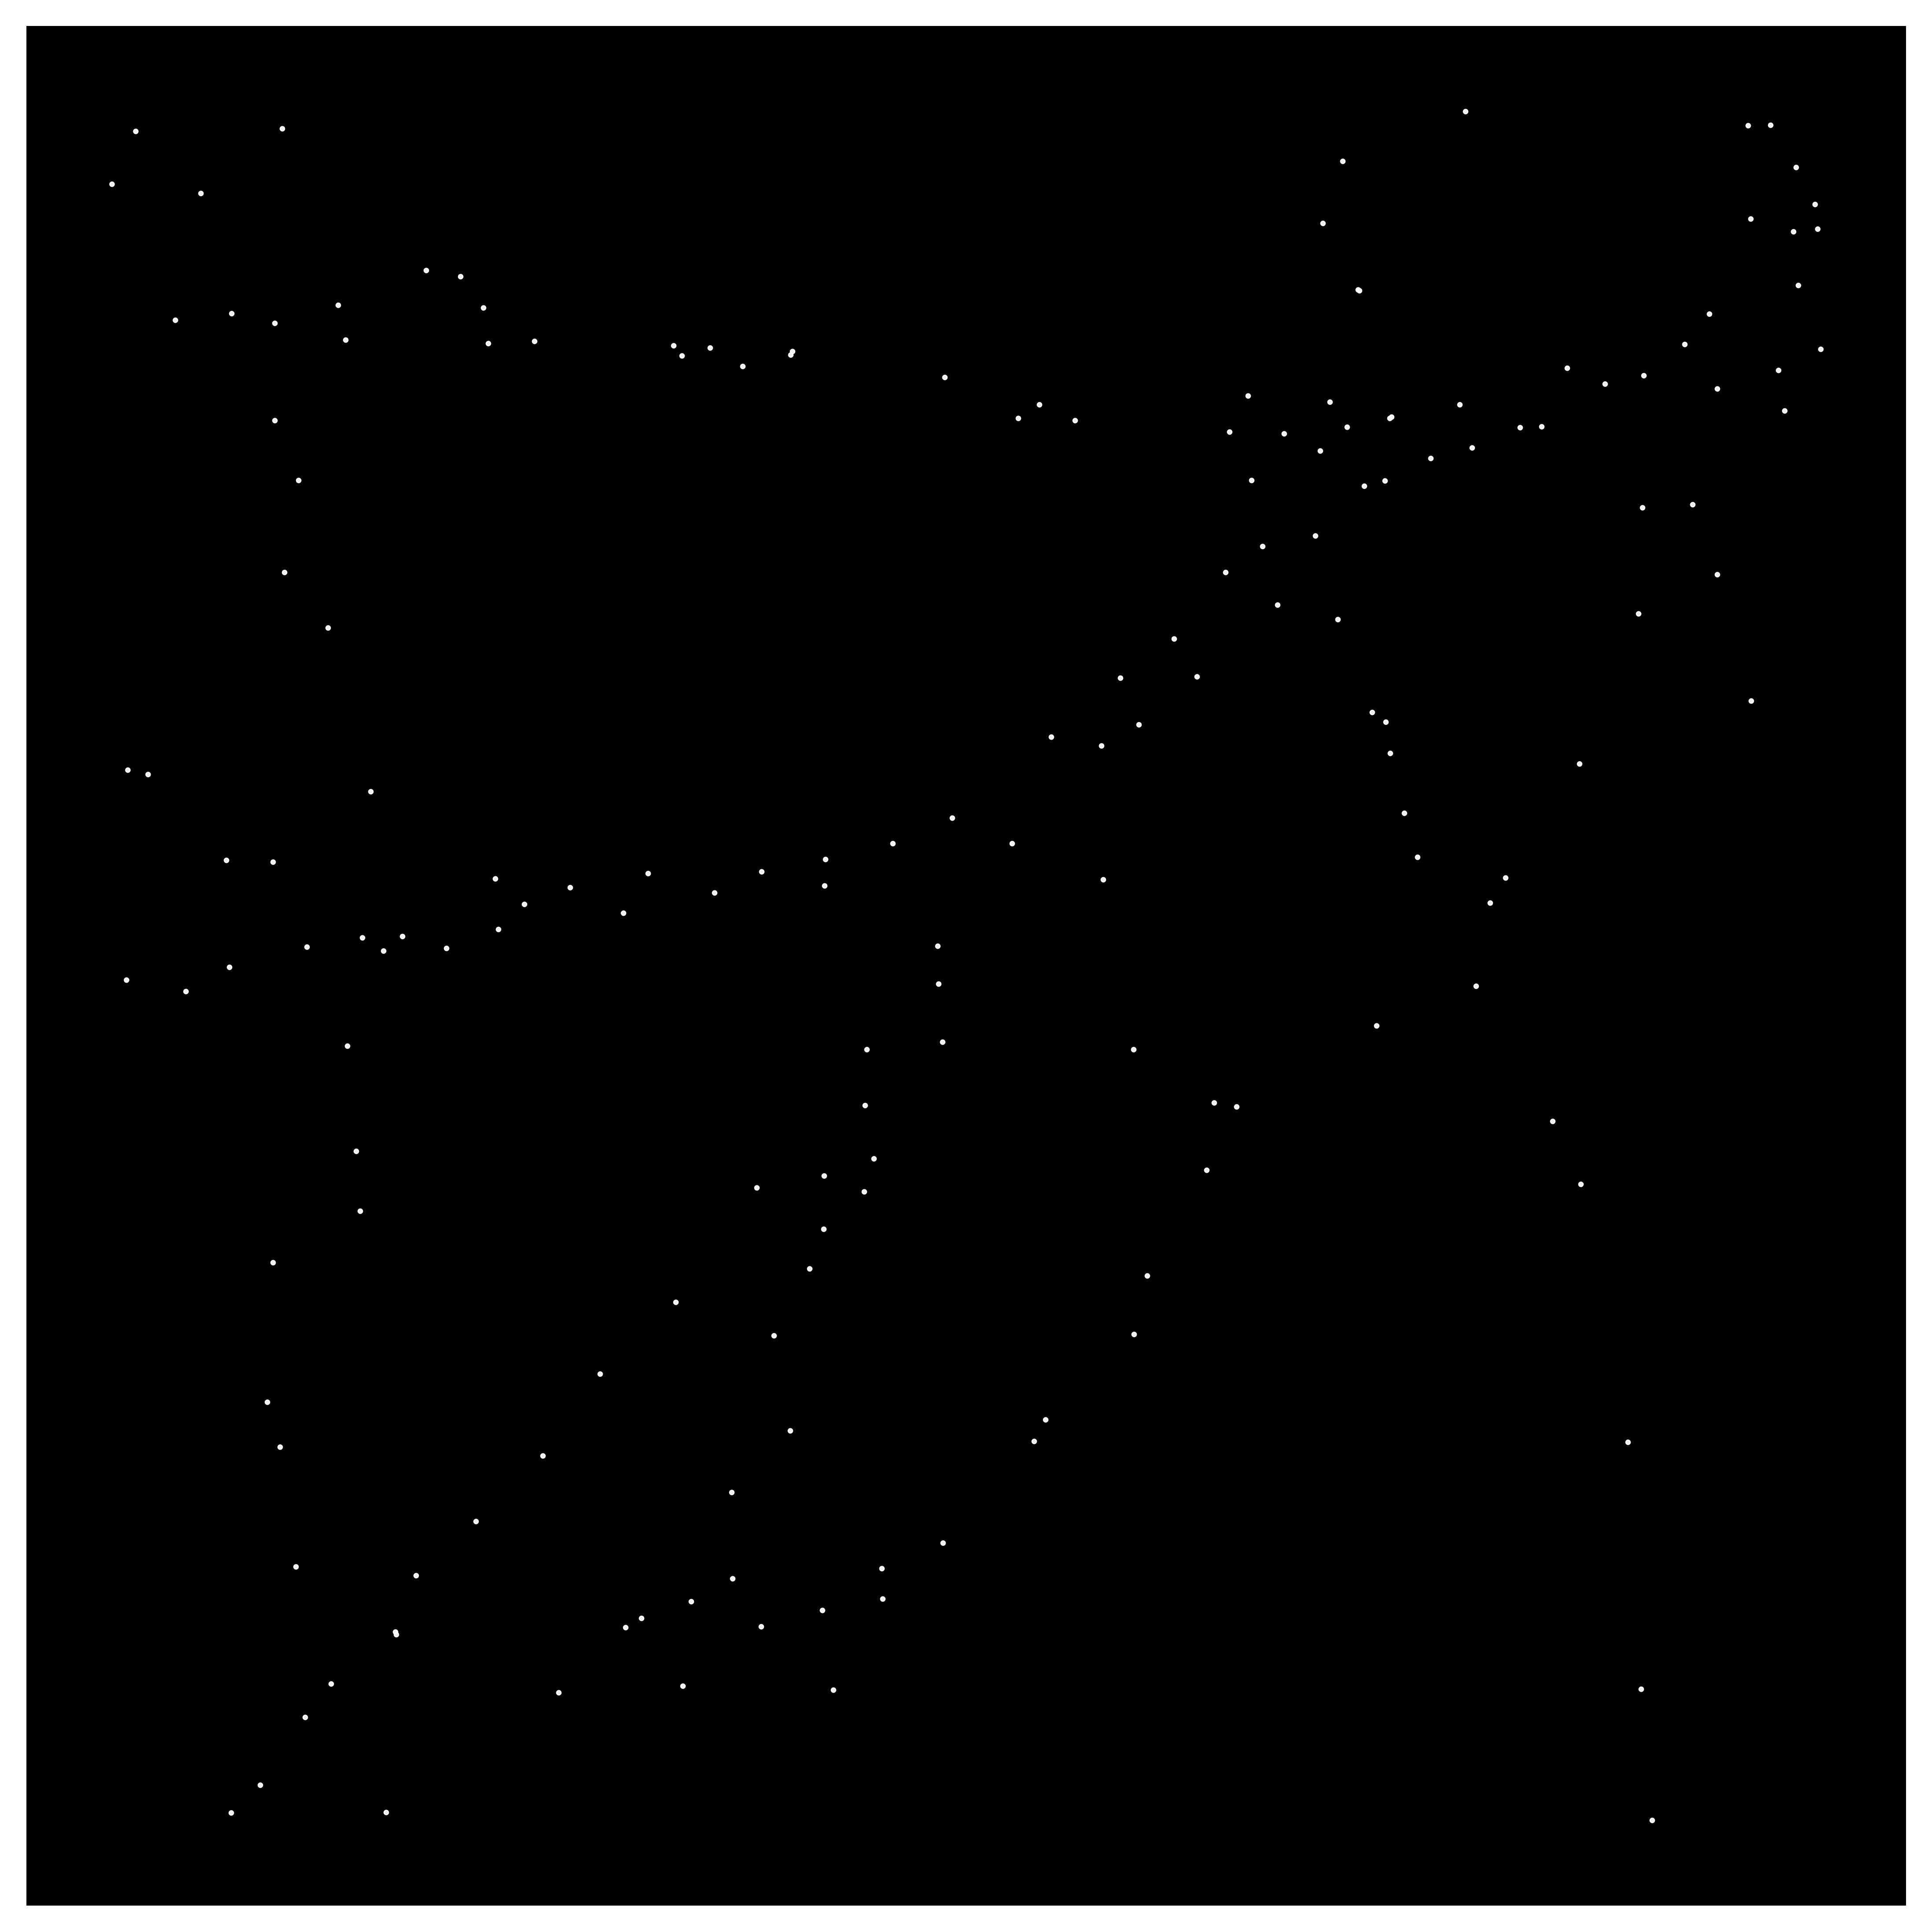

In [23]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3.6*2,3.6*2), dpi=600, layout='constrained')
df = pd.read_csv('quantization/results_10302023/beta10_AV1Q9.csv')
df = df[df['frame'] == 1]
ax.scatter(df['x [nm]'] / 160, 256 - df['y [nm]'] / 160, s=0.25, c='w')
ax.set_facecolor('k')

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

fig.savefig('STORM_blosc_single_plane_fitting_beta10_AV1Q9.pdf')

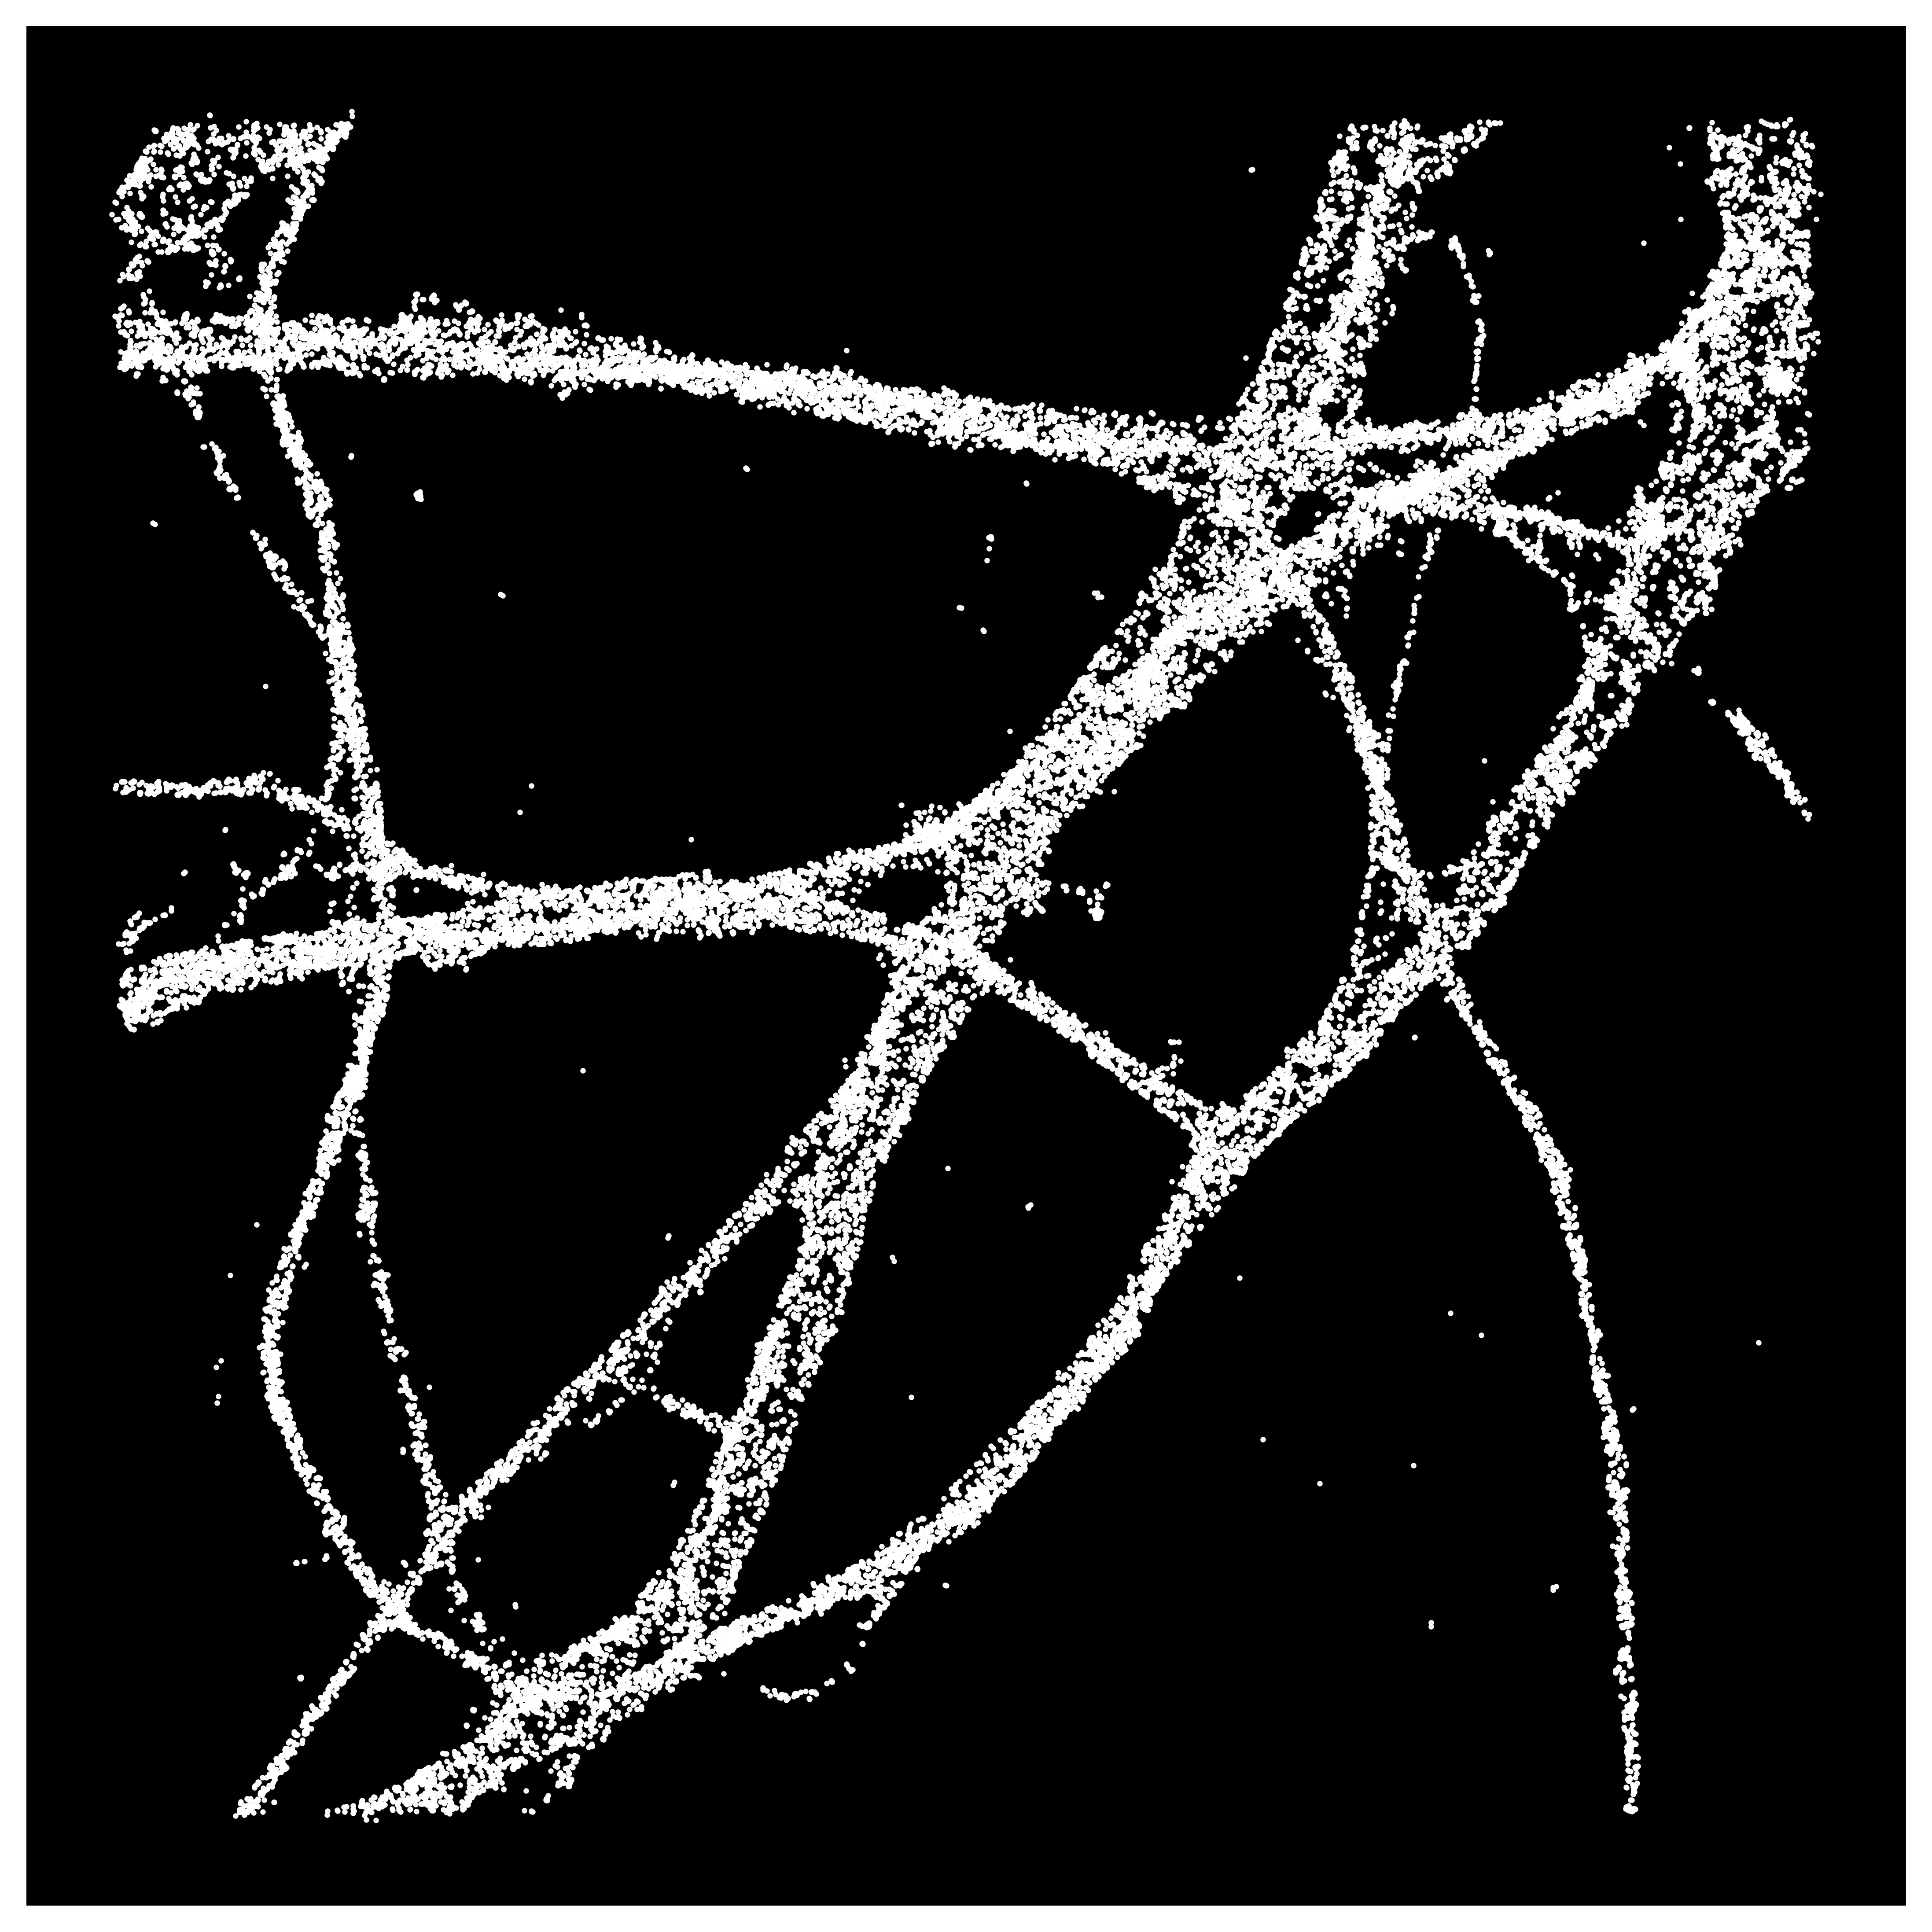

In [24]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3.6*2,3.6*2), dpi=600, layout='constrained')
df = pd.read_csv('quantization/results_10302023/beta10_AV1Q9.csv')
ax.scatter(df['x [nm]'] / 160, 256 - df['y [nm]'] / 160, s=0.25, c='w')
ax.set_facecolor('k')

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

fig.savefig('STORM_blosc_maximum_projection_fitting_beta10_AV1Q9.pdf')

In [23]:
data = pd.read_csv('SMLM_quantization_summary_10192023.csv')
data = data[~data["Compression Type"].str.contains('beta10-scale')]
data = data[~data["Compression Type"].str.contains('lossless')]
data['Compression Type'] = [x.replace('-scale', '-LS') for x in data['Compression Type']]
data['FN Rate'] = data.apply(
    lambda x: 100*x['FN Rate'],
    axis=1
)
data['FP Rate'] = data.apply(
    lambda x: 100*x['FP Rate'],
    axis=1
)

data['Error Rate'] = data.apply(
    lambda x: 100*x['Error Rate'],
    axis=1
)

In [24]:
data

Unnamed: 0 Compression Type         Compression Method  Compression Ratio   
1            1       beta10-AV1               beta10_AV1Q1           6.251242  \
2            2       beta10-AV1               beta10_AV1Q2           7.949147   
3            3       beta10-AV1               beta10_AV1Q3           9.779120   
4            4       beta10-AV1               beta10_AV1Q4          12.207025   
5            5       beta10-AV1               beta10_AV1Q5          15.426141   
6            6       beta10-AV1               beta10_AV1Q6          19.761610   
7            7       beta10-AV1               beta10_AV1Q7          25.561687   
8            8       beta10-AV1               beta10_AV1Q8          33.450721   
9            9       beta10-AV1               beta10_AV1Q9          43.658315   
10          10       beta10-AV1              beta10_AV1Q10          56.635211   
11          11       beta10-AV1              beta10_AV1Q11          69.041714   
12          12         beta8-LS           beta8_Blosc-Zstd           3.477952   
13          13         beta8-LS  beta8_scale0.9_Blosc-Zstd           3.601062   
14          14         beta8-LS  beta8_scale0.8_Blosc-Zstd           3.749835   
15          15         beta8-LS  beta8_scale0.7_Blosc-Zstd           3.931440   
16          16         beta8-LS  beta8_scale0.6_Blosc-Zstd           4.166730   
17          17         beta8-LS  beta8_scale0.5_Blosc-Zstd           4.479269   
18          18         beta8-LS  beta8_scale0.4_Blosc-Zstd           4.926812   
19          19         beta8-LS  beta8_scale0.3_Blosc-Zstd           5.650445   
20          20         beta8-LS  beta8_scale0.2_Blosc-Zstd           7.041613   
21          21         beta8-LS  beta8_scale0.1_Blosc-Zstd          11.492396   
32          34         sqrt8-LS            sqrt8_BloscZstd           4.336944   
33          35         sqrt8-LS   sqrt8_scale0.9_BloscZstd           4.527577   
34          36         sqrt8-LS   sqrt8_scale0.8_BloscZstd           4.761354   
35          37         sqrt8-LS   sqrt8_scale0.7_BloscZstd           5.054657   
36          38         sqrt8-LS   sqrt8_scale0.6_BloscZstd           5.436246   
37          39         sqrt8-LS   sqrt8_scale0.5_BloscZstd           5.963381   
38          40         sqrt8-LS   sqrt8_scale0.4_BloscZstd           6.737370   
39          41         sqrt8-LS   sqrt8_scale0.3_BloscZstd           8.011742   
40          42         sqrt8-LS   sqrt8_scale0.2_BloscZstd          10.171480   
41          43         sqrt8-LS   sqrt8_scale0.1_BloscZstd          12.957986   

    Localization Error Mean  Localization Error Std  Uncertainty Mean   
1                  5.095070               17.227657         12.566112  \
2                  6.381333               18.903481         12.529946   
3                  8.263787               21.268435         12.450007   
4                 10.013860               22.948798         12.337950   
5                 12.260560               26.178560         12.159914   
6                 14.140934               27.741680         11.952189   
7                 16.216311               30.219975         11.708228   
8                 17.237762               30.696838         11.515557   
9                 18.970304               32.214529         11.300399   
10                20.700983               33.657634         11.105771   
11                22.036544               34.414251         10.912071   
12                 2.258298               12.147641         12.607102   
13                 2.550904               13.045179         12.606153   
14                 2.807505               13.394709         12.610979   
15                 3.046160               13.255655         12.617570   
16                 3.598902               14.924724         12.629165   
17                 4.204359               15.653376         12.643991   
18                 5.136665               16.978120         12.686819   
19                 6.564

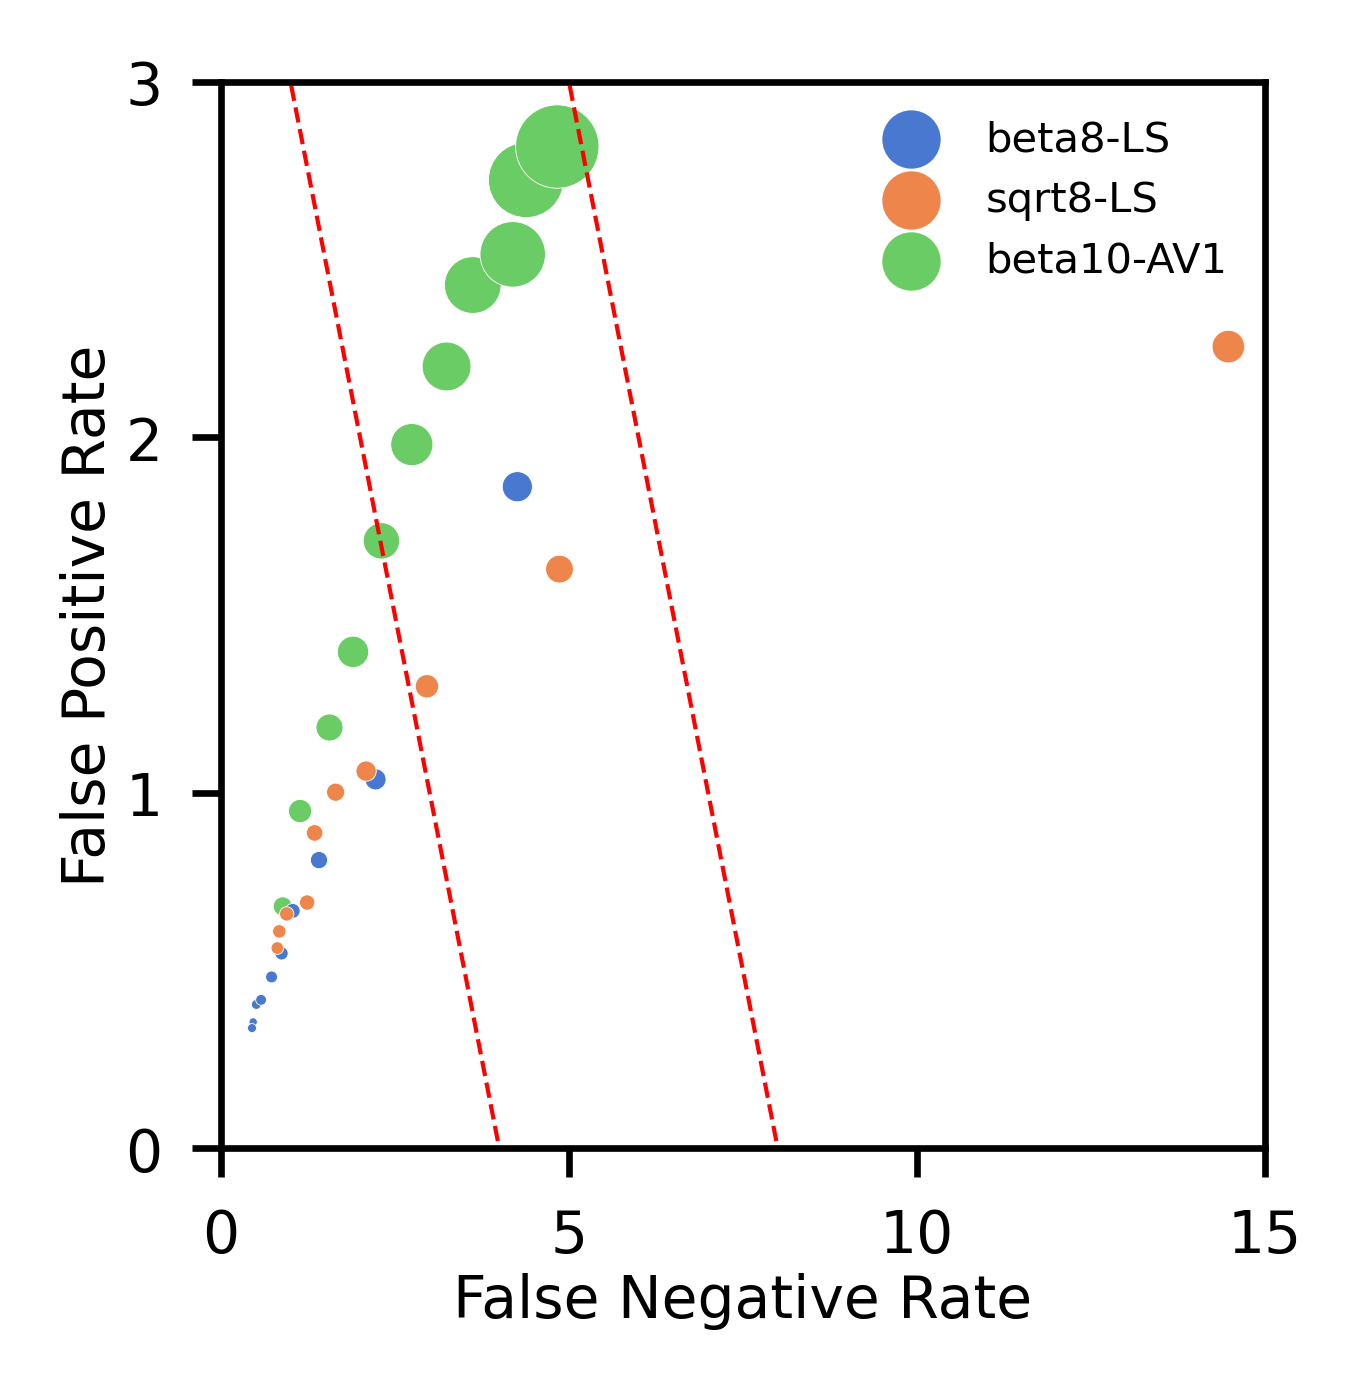

In [25]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2.2,2.2), dpi=600, layout='constrained')

sns.set_palette('muted')

sns.scatterplot(data=data, x="FN Rate", y="FP Rate", hue="Compression Type", size="Compression Ratio", sizes=(1, 100), hue_order=['beta8-LS', 'sqrt8-LS', 'beta10-AV1'], ax=ax)
ax.plot(np.linspace(0, 4, 100), 4 - np.linspace(0, 4, 100), 'r--', lw=0.5)
ax.plot(np.linspace(0, 8, 100), 8 - np.linspace(0, 8, 100), 'r--', lw=0.5)

# for ax in axs:
ax.set_xlabel('False Negative Rate')
ax.set_ylabel('False Positive Rate')
# axs.set_title('Error rate')
ax.set_ylim(0, 3)
ax.set_xlim(0, 15)
ax.set_yticks([0, 1, 2, 3], [0, 1, 2, 3])

ax.legend(loc='lower right', frameon=False, fontsize=5)
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[1:5], labels[1:4], loc='upper right', frameon=False, fontsize=5)

fig.savefig('STORM_loc_error_rate.pdf')